# Prise en main de l'API openfoodfacts

## Install et import

In [3]:
try:
    import openfoodfacts
except:
    !pip install openfoodfacts
    import openfoodfacts

## Tests de l'API

Usage guide :
https://github.com/openfoodfacts/openfoodfacts-python/blob/master/docs/Usage.md

Les facets sont retournés sous forme de listes de dictionnaires.

Les variables sont définies à :
https://world.openfoodfacts.org/data/data-fields.txt

### Requête d'une facette : retourne les modalités d'une variable

In [86]:
additives = openfoodfacts.facets.get_additives()
print(len(additives))
# additives

561


In [1]:
# brands = openfoodfacts.facets.get_brands()
# brands

In [87]:
# openfoodfacts.facets.get_categories()

In [88]:
countries = openfoodfacts.facets.get_countries()
print(len(countries))
#countries

640


In [89]:
# openfoodfacts.facets.get_ingredients()   # erreur dans le code source

In [90]:
languages = openfoodfacts.facets.get_languages()
print(len(languages))
# languages

135


In [91]:
places = openfoodfacts.facets.get_purchase_places()
print(len(places))
# places

4781


In [92]:
stores = openfoodfacts.facets.get_stores()
print(len(stores))
# stores

6436


In [93]:
traces = openfoodfacts.facets.get_traces()
print(len(traces))
# traces

7636


### Requête de produits répondant à une seule modalité de facette

In [77]:
products = openfoodfacts.products.get_by_trace('egg')
print(len(products))
#products

24


In [78]:
products = openfoodfacts.products.get_by_country('France')
print(len(product))
#products

191


In [63]:
ingredient = 'phosphate de calcium'
products_ingredient = openfoodfacts.products.get_by_ingredient(ingredient)
for product in products_ingredient:
    print (product['product_name'])

Mini Fruits
A  Toddler Tout-petits
Almond Dream Almond Milk



### Requête de produits répondant à plusieurs modalités

get_by_facets() : résultat très décevant. La requête ne retourne que 24 produits.

In [79]:
# liste des produits contenant des traces d'oeuf, et country=France
products = openfoodfacts.products.get_by_facets(
#     {'trace': 'egg', 'country': 'france'})
    {'trace': 'egg'})
print(len(products))
#products   # products est une liste de dictionnaires

24


In [58]:
products[1]

{'_id': '4037300108514',
 '_keywords': ['dosensuppen',
  'fertiggerichte',
  'suppen',
  'dosen',
  'in',
  'erasco',
  'konserven',
  'ungarische',
  'gulaschsuppe'],
 'added_countries_tags': [],
 'additives_debug_tags': [],
 'additives_n': 4,
 'additives_old_n': 1,
 'additives_old_tags': ['en:e472e'],
 'additives_original_tags': ['en:e14xx', 'en:e472e', 'en:e412', 'en:e415'],
 'additives_prev_original_tags': [],
 'additives_tags': ['en:e14xx', 'en:e412', 'en:e415', 'en:e472e'],
 'allergens': 'en:gluten,en:milk',
 'allergens_from_ingredients': 'Weizenmehl, Milchzucker, Gerstenmalzextrakt, Milcheiweiß',
 'allergens_from_user': '(de) en:gluten,en:milk',
 'allergens_hierarchy': ['en:gluten', 'en:milk'],
 'allergens_lc': 'de',
 'allergens_tags': ['en:gluten', 'en:milk'],
 'amino_acids_prev_tags': [],
 'amino_acids_tags': [],
 'brands': 'Erasco',
 'brands_tags': ['erasco'],
 'carbon_footprint_percent_of_known_ingredients': '13.4',
 'categories': 'Konserven, Fertiggerichte, Suppen, Fertigge

In [60]:
for product in products:
    print(product['product_name'])
#     print(product['added_countries_tags'])

Adoro Lait
Ungarische Gulaschsuppe
Cioccolato fondente 74%
Darált édespaprika
Biscuit Soja Orange
Cashewkerne
Emincés de poulet
Fromage fondu Les Petits Triangles - 24 portions
Spaghetti Blé & Quinoa - Ail et persil
Sablés nappés chocolat au lait
tarama œufs cabillaud fumé
Cappucino saveur vanille
BISCUITS blé, épeautre et sésame
Eiweißbrötchen
Préparation Falafels Pois Chiches
Hot dog
Mie Nudeln
Black cookies
Pain de mie complet maxi jambon beurre
Palmiers dorés sans sucres ajoutés
Boulghour de riz, légumes et colombo
Mon 1er biscuit au chocolat
Crevettes cuites et décortiquées
Crevettes Décortiquées


In [17]:
products[0].keys()

dict_keys(['_id', '_keywords', 'added_countries_tags', 'additives_debug_tags', 'additives_n', 'additives_old_n', 'additives_old_tags', 'additives_original_tags', 'additives_prev_original_tags', 'additives_tags', 'allergens', 'allergens_from_ingredients', 'allergens_from_user', 'allergens_hierarchy', 'allergens_lc', 'allergens_tags', 'amino_acids_prev_tags', 'amino_acids_tags', 'brands', 'brands_tags', 'categories', 'categories_hierarchy', 'categories_lc', 'categories_old', 'categories_properties', 'categories_properties_tags', 'categories_tags', 'category_properties', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'codes_tags', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries', 'countries_hierarchy', 'countries_lc', 'countries_tags', 'created_t', 'creator', 'data_quality_bugs_tags', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_tags', 'data_quality_warnings_tags', 'data_sources', 'data_sources_tags', 'debug_param_

In [26]:
type(products)

list

### Requête d'un produit en particulier via le barcode

In [54]:
barcode = '3036810201280'
product = openfoodfacts.products.get_product(barcode)
print(product['product']['product_name'])
print("keys du dictionnaire :", list(product.keys()))
product

Dijon Originale
keys du dictionnaire : ['code', 'product', 'status', 'status_verbose']


{'code': '3036810201280',
 'product': {'_id': '3036810201280',
  '_keywords': ['dijon-senf',
   'grocerie',
   'condiment',
   'sauce',
   'maille',
   'dijon',
   'originale',
   'mustard',
   'unspecified'],
  'additives_debug_tags': [],
  'additives_n': 2,
  'additives_old_n': 0,
  'additives_old_tags': [],
  'additives_original_tags': ['en:e330', 'en:e224'],
  'additives_prev_original_tags': ['en:e330', 'en:e224'],
  'additives_tags': ['en:e224', 'en:e330'],
  'allergens': 'en:mustard,de:Kaliummetabisulfit',
  'allergens_from_ingredients': 'Senfkörner, Kaliummetabisulfit',
  'allergens_from_user': '(en) en:mustard,de:Kaliummetabisulfit',
  'allergens_hierarchy': ['en:mustard', 'de:Kaliummetabisulfit'],
  'allergens_lc': 'en',
  'allergens_tags': ['en:mustard', 'de:kaliummetabisulfit'],
  'amino_acids_prev_tags': [],
  'amino_acids_tags': [],
  'brands': 'Maille',
  'brands_tags': ['maille'],
  'categories': 'Lebensmittel, Gewürzmittel, Saucen, Senfe, Dijon-Senfe',
  'categories_hie

### Search

#### Basic search

La méthode search_all() est préférable à search(). La seconde méthode retourne des méta-données en plus de l'itérable.

##### Méthode search()

In [80]:
query = 'mustard maille'
search_result = openfoodfacts.products.search(query)
# search_result

##### Méthode search_all()

In [83]:
query = 'mustard maille'
search_result = openfoodfacts.products.search_all(query)
for product in search_result:
#     print (product['product_name'])
#     display(product)
    pass

#### Advanced Search : non pertinent

### Download data

In [44]:
file_type = 'csv'
openfoodfacts.utils.download_data(file_type)

L'instruction download_data() télécharge le data set dans le dossier ~/user.
Ca a pris 5min17s le 5 mai.

## Conclusion des tests

Les résultats sont décevants. Les requêtes retournent des données incomplètes.
Quant à la fonction de download de data, elle fonctionne et récupère le dataset.

# Prise en main du jeu de données openfoodfact

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import linregress as reg_lin

Modification des paramètres d'affichage de Jupyter :

In [2]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 165 sur ma config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:97% }</style>")

## Ouverture du fichier .csv  =>  df1

Pour le fichier csv, on prend connaissance de :  
- son contenu (fonction "display" de IPython).
- ses infos et sa description (méthodes "info" et "describe" de pandas).
- de la qualité des données (fonctions du module missingno).

In [3]:
#df1 = pd.read_csv('products.csv', sep='\t', low_memory=False)     # 54s avec low_memory=True ; 75s avec low_memory=False, mais gère le dtype automatiquement

In [4]:
#df1.to_pickle('products_type')#, compression=None)     # 15s     # 16s avec compression=None

In [5]:
df1 = pd.read_pickle('products_type')     # 11s

Extraction complète de quelques lignes du df

In [6]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1.loc[[4]])

code  \
4  0000000000100   

                                                                                                url  \
4  http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille   

  creator   created_t      created_datetime  last_modified_t  \
4   del51  1444572561  2015-10-11T14:09:21Z       1444659212   

  last_modified_datetime                  product_name  \
4   2015-10-12T14:13:32Z   moutarde au moût de raisin    

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
4                      NaN          NaN     100g       NaN            NaN   

  packaging_text         brands    brands_tags  \
4            NaN  courte paille  courte-paille   

                                categories  \
4  Epicerie, Condiments, Sauces, Moutardes   

                                    categories_tags  \
4  en:groceries,en:condiments,en:sauces,en:mustards   

                          categories_en origins origins_tags origins_en  \
4  Groceries,Condiments,Sauces,Mustards     NaN          NaN        NaN   

  manufacturing_places manufacturing_places_tags         labels  \
4                  NaN                       NaN  Delois france   

        labels_tags         labels_en emb_codes emb_codes_tags  \
4  fr:delois-france  fr:delois-france       NaN            NaN   

  first_packaging_code_geo  cities cities_tags purchase_places         stores  \
4                      NaN     NaN         NaN             NaN  courte paille   

  countries countries_tags countries_en  \
4    France      en:france       France   

                                                                                                                                                                                                                                                        ingredients_text  \
4  eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille)   

    allergens  allergens_en traces traces_tags traces_en serving_size  \
4  en:mustard           NaN    NaN         NaN       NaN          NaN   

   serving_quantity  no_nutriments  additives_n additives additives_tags  \
4               NaN            NaN          0.0       NaN            NaN   

  additives_en  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
4          NaN                          0.0                        NaN   

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
4                            NaN                                      0.0   

   ingredients_that_may_be_from_palm_oil  \
4                                    NaN   

  ingredients_that_may_be_from_palm_oil_tags  nutriscore_score  \
4                                        NaN              18.0   

  nutriscore_grade  nova_group   pnns_groups_1         pnns_groups_2  \
4                d         NaN  Fat and sauces  Dressings and sauces   

                                                                                                                                                                                                                      states  \
4  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:packaging-to-be-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                          states_tags  \
4  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-to-be-completed,en:packaging-to-be-completed,en:photos-to-be-validated,en:photos-uploaded  

In [7]:
length = len(df1)
print("length =", length)

length = 1772411


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772411 entries, 0 to 1772410
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 2.5+ GB


In [9]:
df1_describe = df1.describe(include='all')

In [10]:
df1_describe

code                                                url  \
count         1772411                                            1772411   
unique        1772407                                            1772407   
top     3770008983205  http://world-en.openfoodfacts.org/product/3770...   
freq                2                                                  2   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

        creator     created_t      created_datetime  last_modified_t  \
count   1772407  1.772411e+06               1772411     1.772411e+06   
unique    13503           NaN               1522629              NaN   
top     kiliweb           NaN  2020-04-23T17:22:07Z              NaN   
freq     998310           NaN                    28              NaN   
mean        NaN  1.551895e+09                   NaN     1.587144e+09   
std         NaN  5.030906e+07                   NaN     2.886685e+07   
min         NaN  1.328021e+09                   NaN     1.333873e+09   
25%         NaN  1.519640e+09                   NaN     1.577994e+09   
50%         NaN  1.563093e+09                   NaN     1.587670e+09   
75%         NaN  1.587672e+09                   NaN     1.609847e+09   
max         NaN  1.620176e+09                   NaN     1.620176e+09   

       last_modified_datetime                  product_name  \
count                 1772411                       1694885   
unique                1378569                       1113910   
top      2021-05-01T11:16:01Z  Aceite de oliva virgen extra   
freq                      213                          1256   
mean                      NaN                           NaN   
std                       NaN                           NaN   
min                       NaN                           NaN   
25%                       NaN                           NaN   
50%                       NaN                           NaN   
75%                       NaN                           NaN   
max                       NaN                           NaN   

       abbreviated_product_name                              generic_name  \
count                      3660                                    113926   
unique                     3601                                     82994   
top        6x27,5cl tourtel twi  Pâtes alimentaires de qualité supérieure   
freq                          9                                       284   
mean                        NaN                                       NaN   
std                         NaN                                       NaN   
min                         NaN                                       NaN   
25%                         NaN                                       NaN   
50%                         NaN                                       NaN   
75%                         NaN                                       NaN   
max                         NaN                                       NaN   

       quantity   packaging    packaging_tags              packaging_text  \
count    457438      284337            284310                        3996   
unique    35535       51234             41782                        2423   
top       500 g  Kunststoff  sachet,plastique  1 sachet plastique à jeter   
freq      19776        6477              9113                          96   
mean        NaN         NaN               NaN                         NaN   
std         NaN         NaN               NaN                         NaN   
min         NaN   

In [11]:
# msno.bar(df1)     # trop de colonnes => bug de msno
# msno.matrix(df1)    # 30Go de RAM

## Nom des colonnes et disponibilité des données par colonne

In [12]:
# définitions récupérées
definitions = {
"code" : "barcode of the product",     # (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
"url" : "url of the product page on Open Food Facts",
"creator" : "contributor who first added the product",
"created_t" : "date that the product was added (UNIX timestamp format)",
"created_datetime" : "date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)",
"last_modified_t" : "date that the product page was last modified",
"product_name" : "name of the product",
"quantity" : "quantity and unit",
"packaging" : "shape, material",
"origins" : "origins of ingredients",
"manufacturing_places" : "places where manufactured or transformed",
"first_packaging_code_geo" : "coordinates corresponding to the first packaging code indicated",
"countries" : "list of countries where the product is sold",
"serving_size" : "serving size in g",
"no_nutriments" : "indicates if the nutrition facts are indicated on the food label",
"additives_n" : "number of food additives",
"nutrition_grade_fr" : "nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore",
"fruits-vegetables-nuts_100g" : "% of fruits, vegetables and nuts (excluding potatoes, yams, manioc)",
"carbon-footprint_100g" : "carbon footprint (as indicated on the packaging of some products)",
"nutrition-score-fr_100g" : "Nutri-Score FR",     # Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
"nutrition-score-uk_100g" : "nutrition score defined by the UK Food Standards Administration (FSA)",
"pnns_groups_1" : "parmi les 7 groupes d'aliments du PNNS",     # https://www.mangerbouger.fr/pro/IMG/pdf/livret_civ.pdf
"nova_group" : "Une classification en 4 groupes (1,2,3,4) pour mettre en évidence le degré de transformation des aliments"     # https://fr.openfoodfacts.org/nova
}

In [13]:
print("NOM DES COLONNES".rjust(45,' '), "NOMBRE DE DONNEES".rjust(18,' '), "% DISPONIBLE".rjust(15,' '), "DTYPE".rjust(10,' '), "   DESCRIPTION")
for colonne in df1_describe :
    if colonne in definitions :
        description = definitions[colonne]
    else :
       description = ""
    print(colonne.rjust(45,' '), str(int(df1_describe[colonne]['count'])).rjust(18,' '), "{0:0.3f}".format(df1_describe[colonne]['count']/len(df1)*100).rjust(15,' '), str(df1[colonne].dtype).rjust(10,' '), "   " + description)

                             NOM DES COLONNES  NOMBRE DE DONNEES    % DISPONIBLE      DTYPE    DESCRIPTION
                                         code            1772411         100.000     object    barcode of the product
                                          url            1772411         100.000     object    url of the product page on Open Food Facts
                                      creator            1772407         100.000     object    contributor who first added the product
                                    created_t            1772411         100.000      int64    date that the product was added (UNIX timestamp format)
                             created_datetime            1772411         100.000     object    date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
                              last_modified_t            1772411         100.000      int64    date that the product page was last modified
                       last_modified_datetime

## Notions de calcul du Nutriscore et données correspondantes dans le dataset

## Analyse univariée des variables du dataframe df1

### Histogramme du nutriscore_score

In [14]:
ser = df1['nutriscore_score']

In [15]:
np.sort(ser.unique())

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  nan])

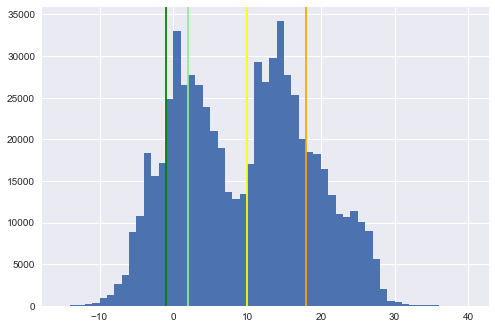

In [16]:
# plotting histogram
bins=range(-15,41)
plt.style.use('seaborn')
plt.hist(ser, bins=bins)
# axvline
plt.axvline(x=-1, color='green')         # grade A solide
plt.axvline(x=2, color='lightgreen')     # grade B solide
plt.axvline(x=10, color='yellow')        # grade C solidec
plt.axvline(x=18, color='orange')        # grade D solide
plt.show()

### Fonction histogramme()

Retourne un histogramme pour une variable (colonne) du df1

Arguments :

    - colonne : string du nom de colonne
    - min_x : valeur min représentée en abcisse
    - max_x : valeur max représentée en abcisse
    - density : si True, trace les fréquences (normées à 1) ; si False, trace les effectifs.
    - type_variable : 'discrète' pour un tracé de type barchart ; 'continue' pour un tracé de type histogramme
    - n_bins : nb d'intervalles dans l'histogramme

In [17]:
def histogramme(colonne='additives_n', min_x=None, max_x=None, density=True, type_variable='discrète', n_bins=None) :
    
    # extraction du dataframe
    ser = df1[colonne]
    total_count = df1_describe[colonne]['count']

    # ser_min, ser_max
    if max_x is None :
        ser_max = ser.max()
    else :
        ser_max = max_x
    if min_x is None :
        ser_min = ser.min()
    else :
        ser_min = min_x
        
    # type_variable
    if type_variable == 'discrète' :     # on trace un bar chart centré sur la valeur centrale plutôt qu'un "vrai" histogramme
        align = 'left'
        rwidth = 0.8
        bins=range(int(ser_min), int(ser_max+1))     # il y a autant de bins que de modalités de la variable discrète
    elif type_variable == 'continue':  
        align = 'mid'
        rwidth = 1.0
        if n_bins is None:
            nb_bins = int(np.log2(total_count)+1)     # Règle de Sturges
        else:
            nb_bins = n_bins
        bins=[( ser_min + x*(ser_max-ser_min)/nb_bins ) for x in range(0, nb_bins)]     # nb_bins espacés linéairement
    
    # titre
    if density == True :
        if type_variable == 'discrète' :
            plt.title(label='Fréquence de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        elif type_variable == 'continue':  
            plt.title(label='Densité de probabilité de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    else :
        plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        
    # plotting
    plt.style.use('seaborn')
    plt.hist(ser, bins=bins, density=density, label=colonne, align=align, rwidth=rwidth)
    plt.legend()
    plt.show()
    

### Fonction boite_moustaches()

Retourne un boxplot pour une variable (colonne) du df1.  
Marque la moyenne avec un point rouge.
Affiche les valeurs : moyenne, médiane, écart-type (empirique).

Arguments :  
- colonne : string du nom de colonne  
- min_x : valeur min représentée en abcisse  
- max_x : valeur max représentée en abcisse  

In [18]:
def boite_moustaches(colonne='energy-kj_100g', min_x=None, max_x=None) :
    plt.style.use('seaborn')

    # extraction du dataframe
    ser = df1[colonne]
    ser.dropna(inplace=True)
    
    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x
    def f_bool(x):
        if x < min_x :
            return False
        elif x > max_x:
            return False
        else:
            return True
    ser_bool = ser.apply(lambda x : f_bool(x))
    total_count = ser_bool.sum()  # nb de valeurs comprises dans l'intervalle [min_x, max_x]
    ser=ser[ser_bool]
    
    # moyenne, médiane, écart-type
    moyenne = ser.mean()   
    mediane = ser.median()
    ecart_type = ser.std()
    
    # plotting boxplot
    plt.boxplot(ser, vert=0)
    plt.xlim(min_x-0.01*largeur,max_x+0.01*largeur) 
    plt.ylim(1.25, 0.75) 
    plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    plt.yticks(ticks=[1], labels=[''])
    # plotting dot "moyenne"
    plt.plot(moyenne, 1, marker='o', markersize=10, color='red')    # le boxplot est tracé à l'ordonnée y=1  # L'axe des y est inversé
    # annotations
    plt.annotate(text="Médiane = {0:0.2f}".format(mediane), xy=(min_x+largeur/20,0.8), color='green')
    plt.annotate(text="Moyenne = {0:0.2f}".format(moyenne), xy=(min_x+largeur/20,0.85), color='red')
    plt.annotate(text="Ecart-type = {0:0.2f}".format(ecart_type), xy=(min_x+largeur/20,0.9), color='blue')
    plt.show()

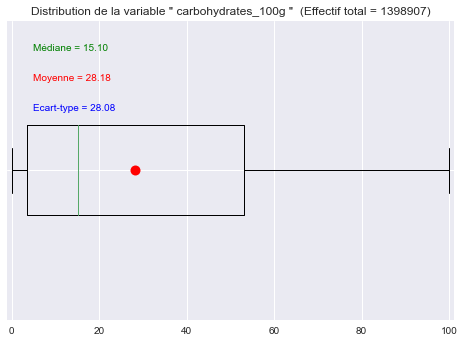

In [19]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100)

### Tracé d'histogrammes et de boxplots

#### Variables quantitatives discrètes

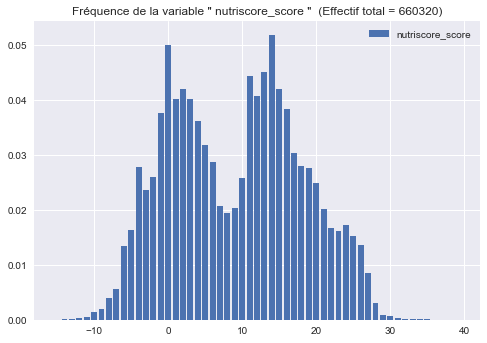

In [20]:
histogramme('nutriscore_score', type_variable='discrète')

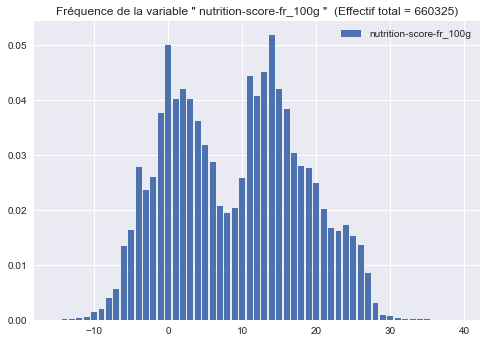

In [21]:
histogramme('nutrition-score-fr_100g', type_variable='discrète')

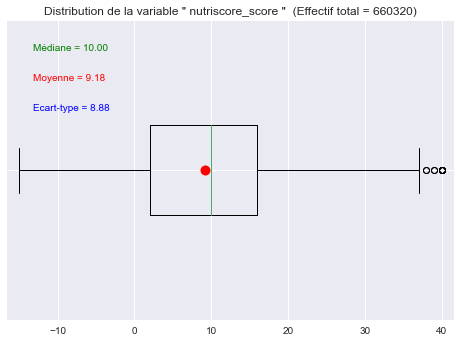

In [22]:
boite_moustaches(colonne='nutriscore_score', min_x=-16, max_x=41)

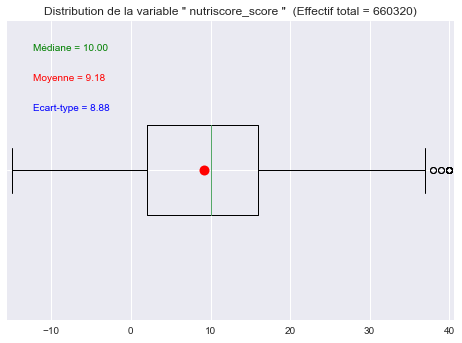

In [23]:
boite_moustaches(colonne='nutriscore_score', min_x=-15, max_x=40)

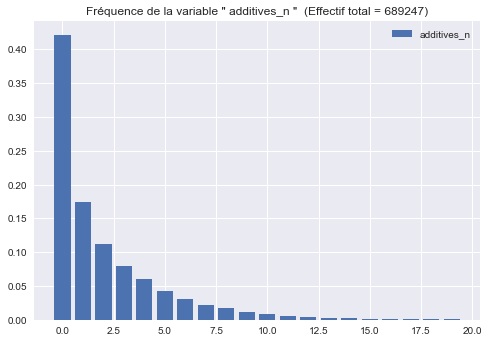

In [24]:
histogramme('additives_n', max_x=20, type_variable='discrète')

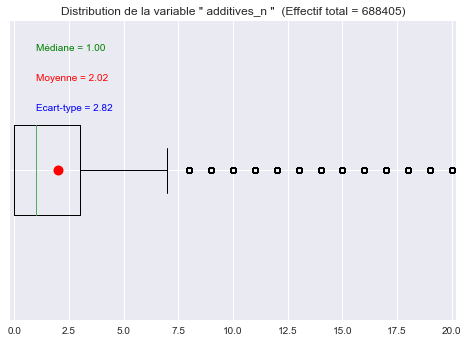

In [25]:
boite_moustaches(colonne='additives_n', min_x=0, max_x=20)

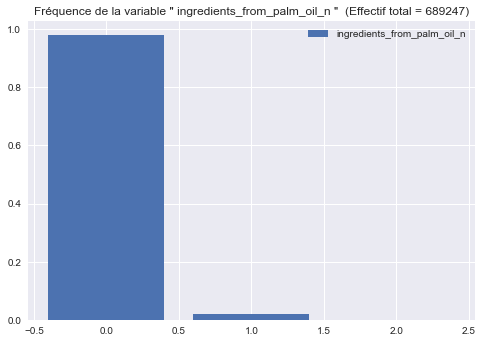

In [26]:
histogramme('ingredients_from_palm_oil_n', type_variable='discrète')

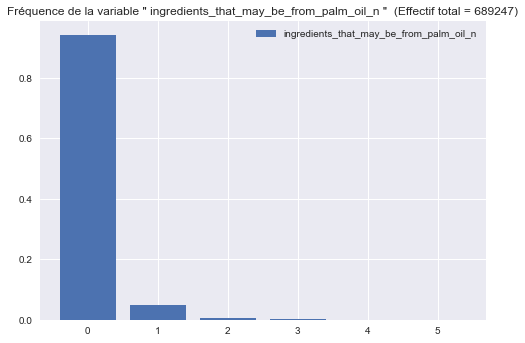

In [27]:
histogramme('ingredients_that_may_be_from_palm_oil_n', type_variable='discrète')

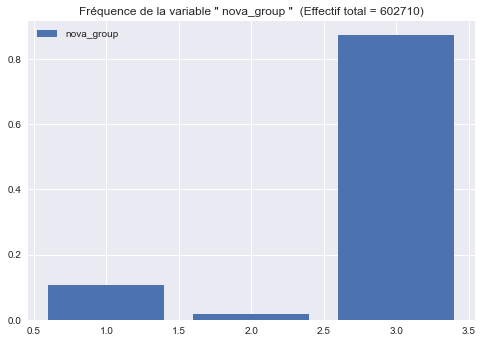

In [28]:
histogramme('nova_group', type_variable='discrète')

#### Variables quantitatives continues

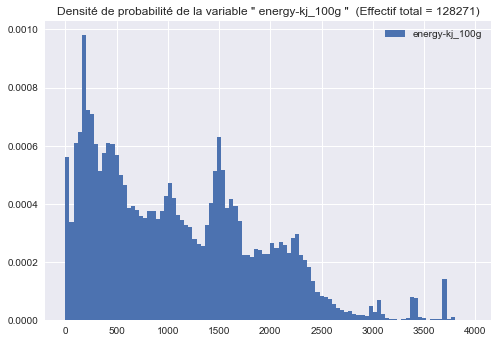

In [29]:
histogramme('energy-kj_100g', type_variable='continue', density=True, min_x=0, max_x=4000, n_bins=100)

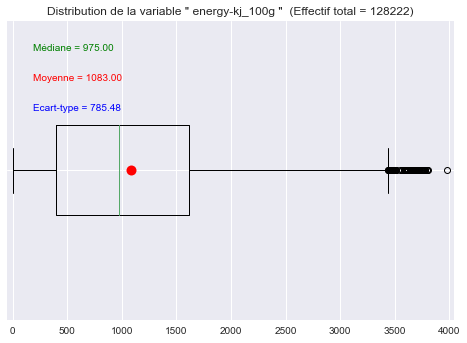

In [30]:
boite_moustaches(colonne='energy-kj_100g', min_x=-10, max_x=4000)

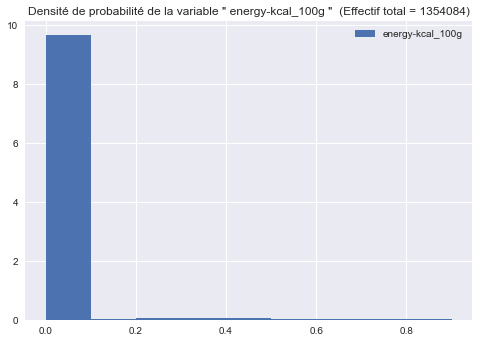

In [31]:
histogramme('energy-kcal_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=10)     # cette variable est buggée (les valeurs sont preque toutes < 0.1)

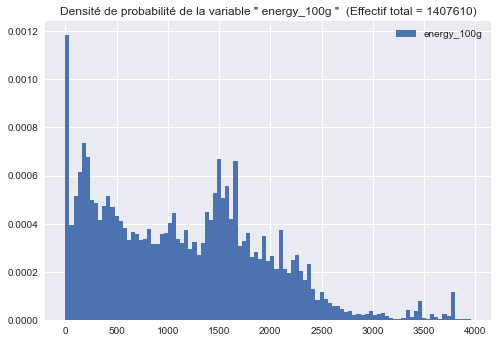

In [32]:
histogramme('energy_100g', type_variable='continue', density=True, min_x=0, max_x=4000, n_bins=100)     # variable pas claire : kj ou kcal ?!?

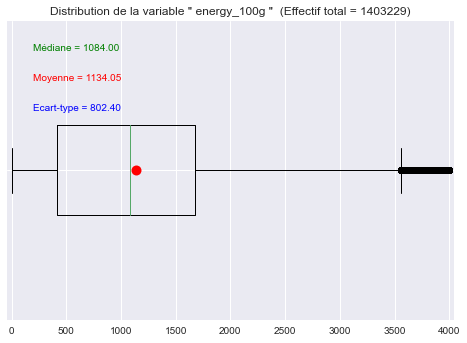

In [33]:
boite_moustaches(colonne='energy_100g', min_x=0, max_x=4000)

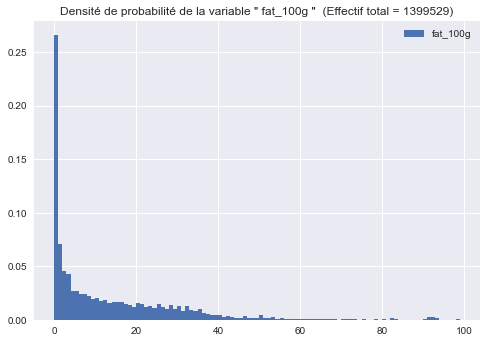

In [34]:
histogramme('fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

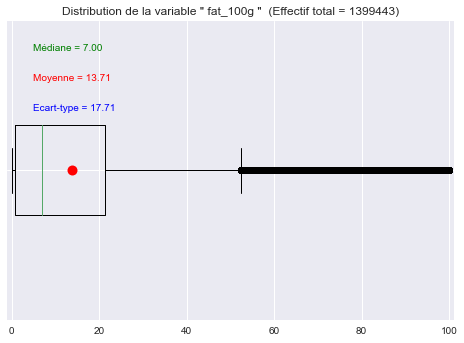

In [35]:
boite_moustaches(colonne='fat_100g', min_x=0, max_x=100)

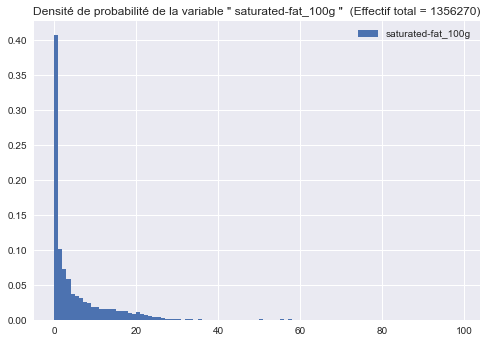

In [36]:
histogramme('saturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

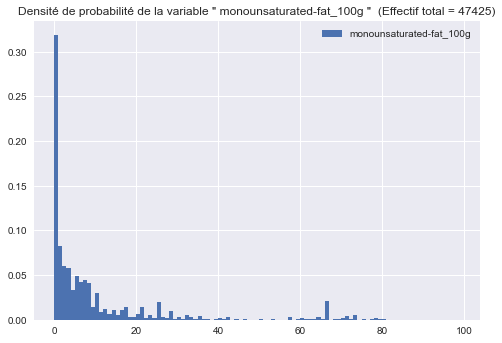

In [37]:
histogramme('monounsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

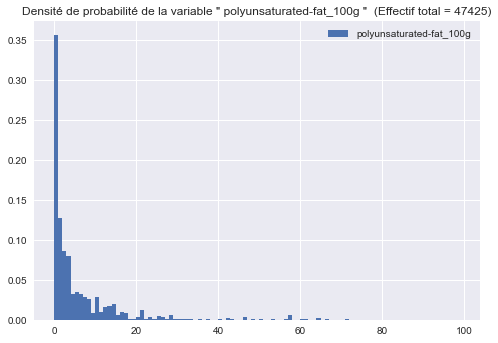

In [38]:
histogramme('polyunsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

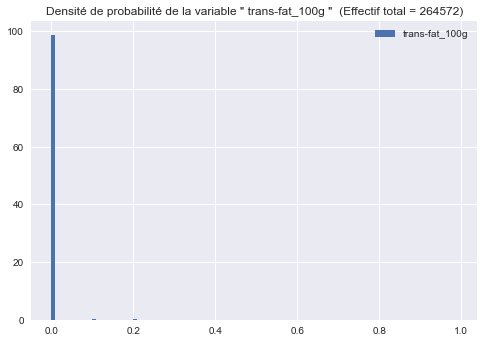

In [39]:
histogramme('trans-fat_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=100)

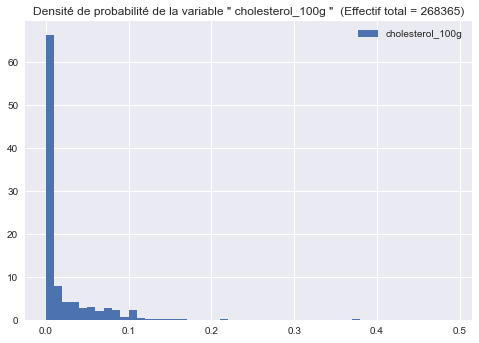

In [40]:
histogramme('cholesterol_100g', type_variable='continue', density=True, min_x=0, max_x=0.5, n_bins=50)

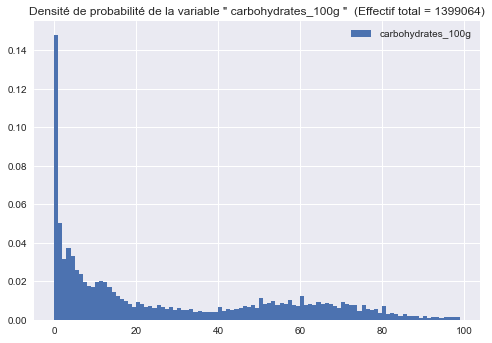

In [41]:
histogramme('carbohydrates_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

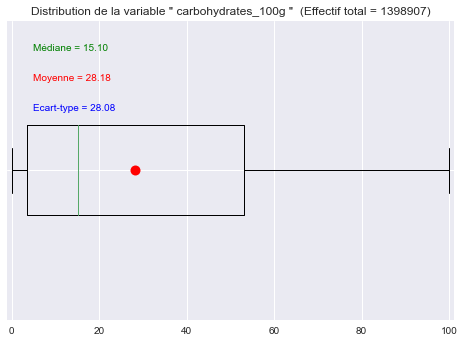

In [42]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100)

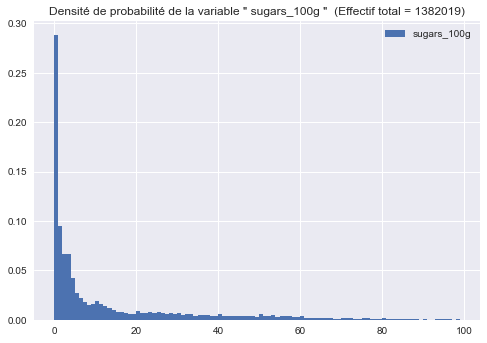

In [43]:
histogramme('sugars_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

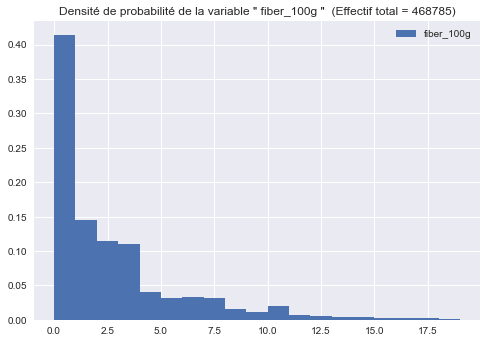

In [44]:
histogramme('fiber_100g', type_variable='continue', density=True, min_x=0, max_x=20, n_bins=20)  # présence de valeurs aberrantes > 100g et < 0g

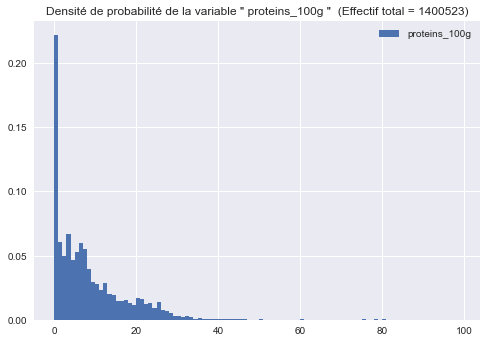

In [45]:
histogramme('proteins_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

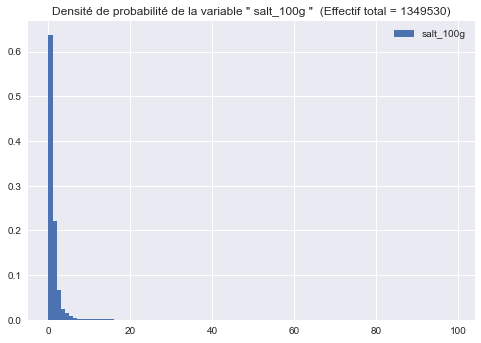

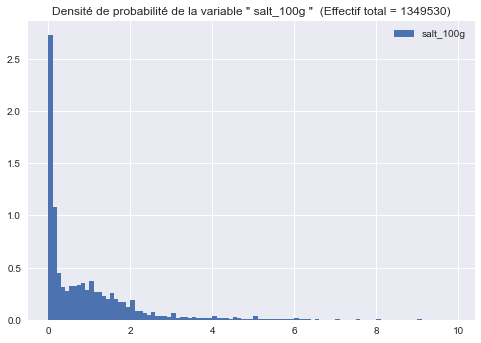

In [46]:
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=100)

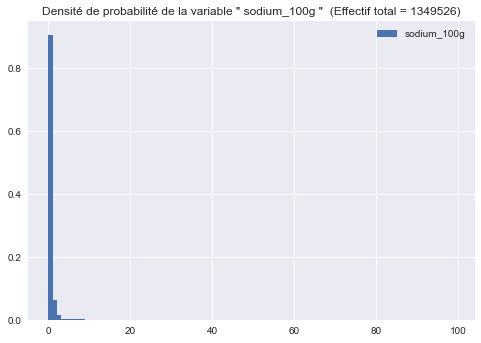

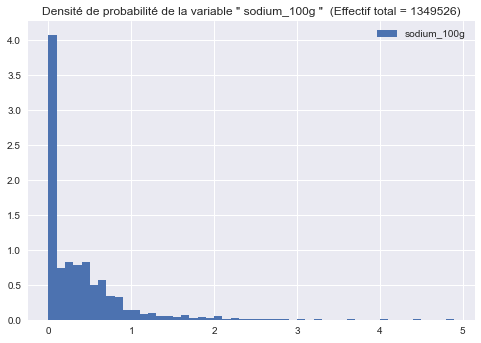

In [47]:
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=5, n_bins=50)

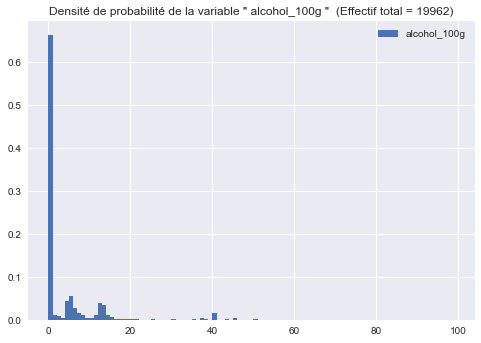

Pour les produits à plus de 1% d'alcool :


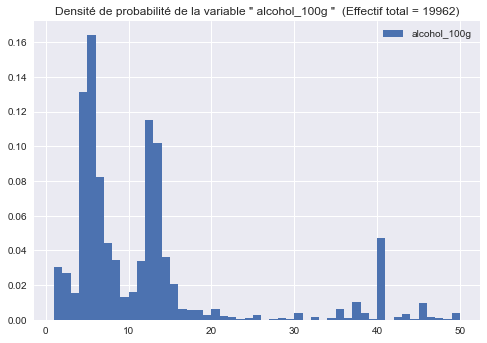

In [48]:
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

print("Pour les produits à plus de 1% d'alcool :")
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=1, max_x=51, n_bins=50)

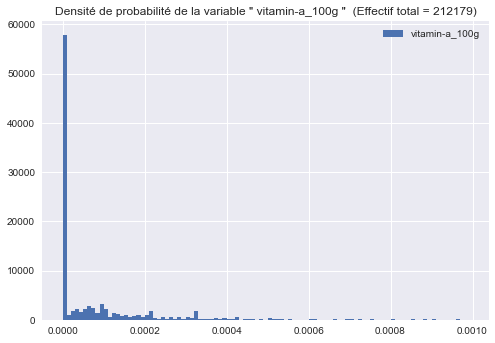

In [49]:
histogramme('vitamin-a_100g', type_variable='continue', density=True, min_x=0, max_x=0.001, n_bins=100)

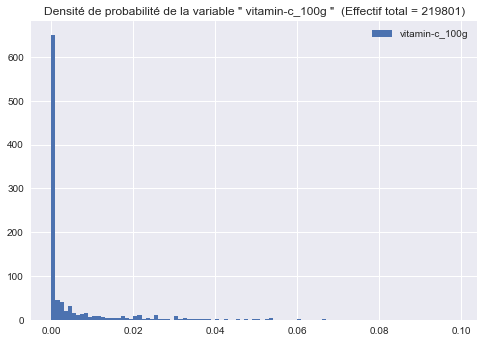

In [50]:
histogramme('vitamin-c_100g', type_variable='continue', density=True, min_x=0, max_x=0.1, n_bins=100)

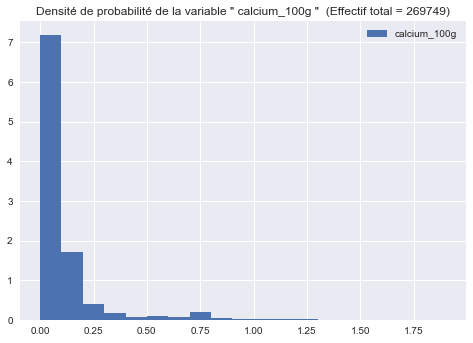

In [51]:
histogramme('calcium_100g', type_variable='continue', density=True, min_x=0, max_x=2, n_bins=20)

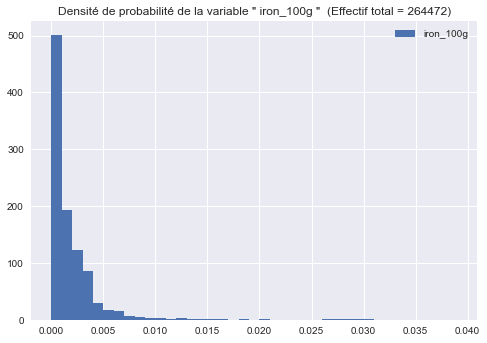

In [52]:
histogramme('iron_100g', type_variable='continue', density=True, min_x=0, max_x=0.04, n_bins=40)

#### Variables qualitatives

##### nutriscore_grade

In [53]:
ser = df1['nutriscore_grade'].value_counts().sort_index()
ser

a    106066
b     83995
c    140397
d    205577
e    124285
Name: nutriscore_grade, dtype: int64

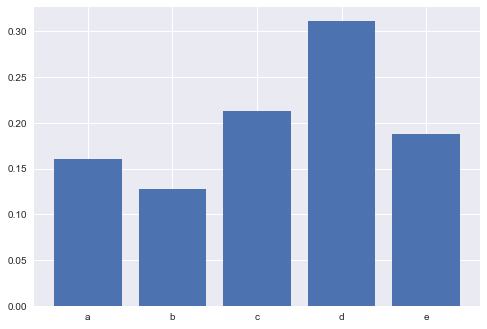

In [54]:
# barplot normalisé
ser = df1['nutriscore_grade'].value_counts(normalize=True).sort_index()
plt.style.use('seaborn')
plt.bar(ser.index, ser.values)
plt.show()

##### pnns_groups_1

In [55]:
ser = df1['pnns_groups_1'].value_counts().sort_index()
ser

Beverages                    64585
Cereals and potatoes         79159
Composite foods              52294
Fat and sauces               67281
Fish Meat Eggs               90503
Fruits and vegetables        46057
Milk and dairy products      87520
Salty snacks                 31928
Sugary snacks               140948
cereals-and-potatoes            56
fruits-and-vegetables         7330
salty-snacks                     6
sugary-snacks                 5365
unknown                    1082602
Name: pnns_groups_1, dtype: int64

In [56]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_1'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

sugary-snacks              0.007971
salty-snacks               0.000009
fruits-and-vegetables      0.010891
cereals-and-potatoes       0.000083
Sugary snacks              0.209422
Salty snacks               0.047439
Milk and dairy products    0.130038
Fruits and vegetables      0.068432
Fish Meat Eggs             0.134471
Fat and sauces             0.099967
Composite foods            0.077699
Cereals and potatoes       0.117616
Beverages                  0.095961
Name: pnns_groups_1, dtype: float64

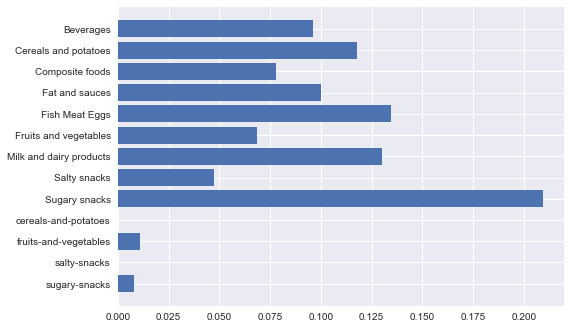

In [57]:
# barplot normalisé
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.xticks(rotation=0)
plt.show()

##### pnns_groups_2

In [58]:
ser = df1['pnns_groups_2'].value_counts().sort_index()
ser

Alcoholic beverages                   15646
Appetizers                            10729
Artificially sweetened beverages       9128
Biscuits and cakes                    60590
Bread                                 21077
Breakfast cereals                      8922
Cereals                               37796
Cheese                                43499
Chocolate products                    13889
Dairy desserts                         6541
Dressings and sauces                  47118
Dried fruits                           5657
Eggs                                   3291
Fats                                  20163
Fish and seafood                      24677
Fruit juices                           8880
Fruit nectars                          1188
Fruits                                15887
Ice cream                              6511
Legumes                                8571
Meat                                  26825
Milk and yogurt                       30969
Nuts                            

In [59]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_2'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

vegetables                          0.010184
pastries                            0.007783
nuts                                0.000009
legumes                             0.000028
fruits                              0.000450
cereals                             0.000054
Waters and flavored waters          0.008999
Vegetables                          0.031686
Unsweetened beverages               0.014278
Teas and herbal teas and coffees    0.002249
Sweets                              0.096430
Sweetened beverages                 0.032433
Soups                               0.003876
Sandwiches                          0.005671
Salty and fatty products            0.019707
Processed meat                      0.050024
Potatoes                            0.004052
Plant-based milk substitutes        0.007889
Pizza pies and quiches              0.000897
Pizza pies and quiche               0.010399
One-dish meals                      0.059796
Offals                              0.001783
Nuts      

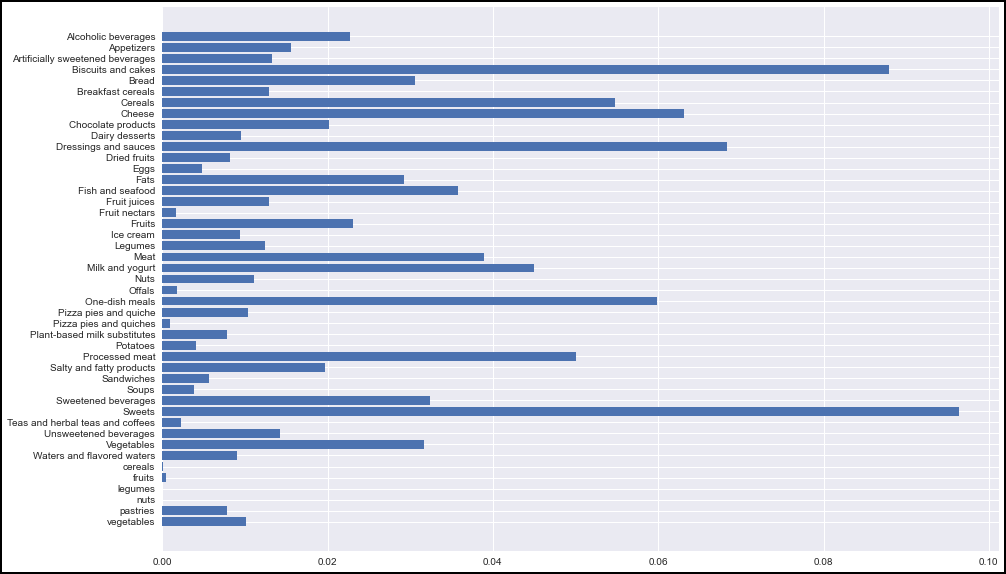

In [60]:
# barplot normalisé
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.yticks(size=10)
plt.show()

##### creator

In [61]:
ser = df1['creator'].value_counts(normalize=True, ascending=True)
ser[-20:]

halal-app-chakib              0.001764
foodless                      0.001882
foodrepo                      0.001896
veganeamos                    0.002743
nutrinet-sante                0.002762
tacinte                       0.003212
swipe-studio                  0.003990
waistline-app                 0.004109
foodvisor                     0.004601
tacite                        0.004887
prepperapp                    0.005682
sebleouf                      0.005816
openfood-ch-import            0.006463
inf                           0.006917
date-limite-app               0.017597
elcoco                        0.018809
org-database-usda             0.075908
openfoodfacts-contributors    0.092026
usda-ndb-import               0.095817
kiliweb                       0.563251
Name: creator, dtype: float64

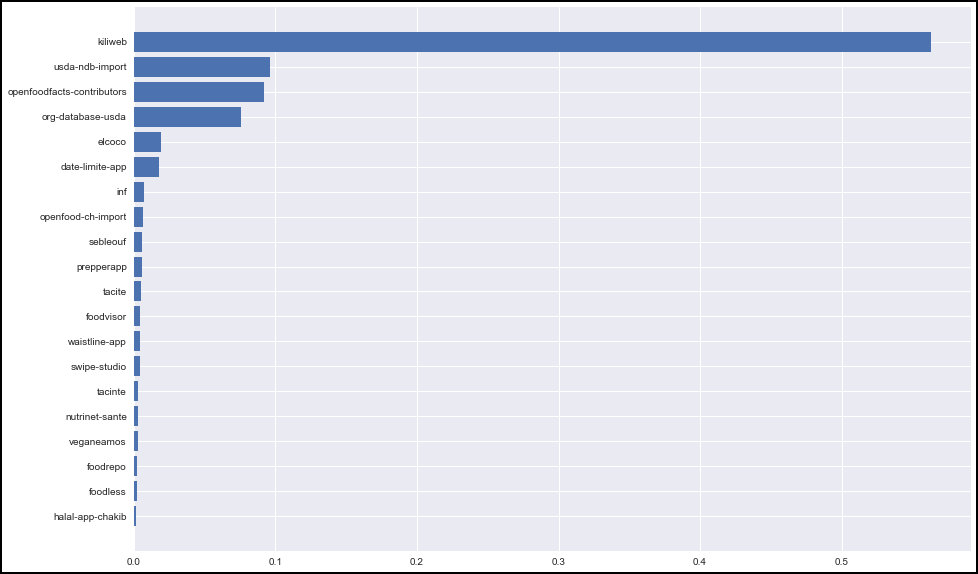

In [62]:
# barplot normalisé des 20 plus gros contributeurs à openfooodfacts
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index[-20:], ser.values[-20:])
plt.yticks(size=10)
plt.show()

## Analyse bivariée des variables quantitatives du dataframe df1

### Fonction scatter_plot()

Retourne un scatter plot pour deux variables (colonnes) du df1

Arguments :

    - colonne_x : string du nom de colonne tracé en abcisse.
    - colonne_y : string du nom de colonne tracé en ordonnée.
    - min_x : valeur min représentée en abcisse.
    - max_x : valeur max représentée en abcisse.
    - min_y : valeur min représentée en ordonnée.
    - max_y : valeur max représentée en ordonnée.
    - alpha : transparence de chaque point.

In [63]:
def scatter_plot(ser_x=df1['sugars_100g'], ser_y=df1['proteins_100g'], min_x=0, max_x=100, min_y=0, max_y=100, alpha=0.002) :

    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x], considérées comme aberrantes.
    largeur_x = max_x - min_x
    largeur_y = max_y - min_y
    def f_bool(x, min, max):
        if np.isnan(x) :
            return False
        elif x < min :
            return False
        elif x > max :
            return False
        else:
            return True
    ser_x_bool = ser_x.apply(lambda x : f_bool(x, min_x, max_x))     # vaut True pour les valeurs non aberrantes
    ser_y_bool = ser_y.apply(lambda y : f_bool(y, min_y, max_y))
    ser_xy_bool = ser_x_bool.multiply(ser_y_bool)     # vaut True pour les valeurs non aberrantes de ser_x et de ser_y, sinon vaut False 
    # ser_x et ser_y sont les séries tracées
    ser_x = ser_x[ser_xy_bool]
    ser_y = ser_y[ser_xy_bool]
    total_count = ser_xy_bool.sum()

    # plotting scatter plot
    plt.style.use('seaborn')
    plt.scatter(ser_x, ser_y, s=1, alpha=alpha)   # la valeur mini de alpha autorisée par pyplot est 0.002
    plt.xlabel(ser_x.name)
    plt.ylabel(ser_y.name)
    plt.title(label='Diagramme de dispersion (Effectif total = '+str(int(total_count))+')')
    plt.ylim(min_y-largeur_y/20,max_y+largeur_y/20)

    # régression linéaire
    slope, intercept, r, p, std_err = reg_lin(ser_x, ser_y)
    model_x = pd.Series([min_x, max_x])
    model_y = slope*model_x + intercept
    plt.plot(model_x, model_y, color='r', linewidth=1, marker=None, linestyle = '-')
    
    plt.annotate(text="Régression linéaire : y = {0:0.2f}*x + {1:0.2f}, R²={2:0.2f}".format(slope, intercept, r*r), xy=(min_x+largeur_x/20,max_y-largeur_y/20), color='red', size=10)
    plt.show()
#     print((min_x+largeur_x/20,max_y-largeur_x/20))

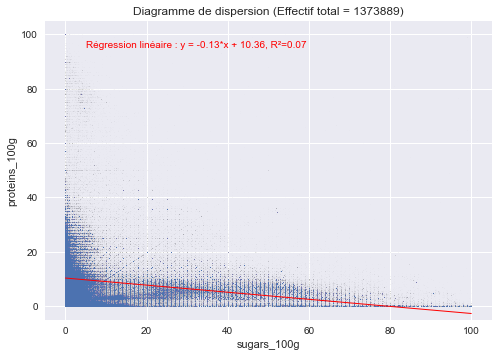

In [64]:
scatter_plot()

### Tracé de scatter plots pour des variables quantitatives continues

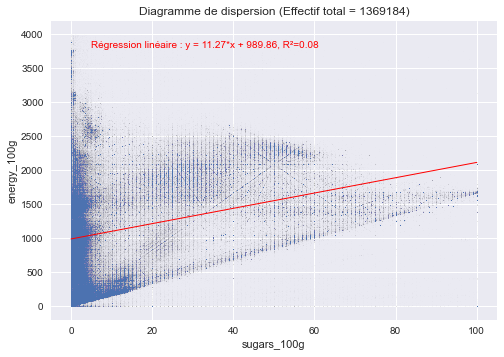

In [65]:
scatter_plot(df1['sugars_100g'], df1['energy_100g'], max_y=4000)

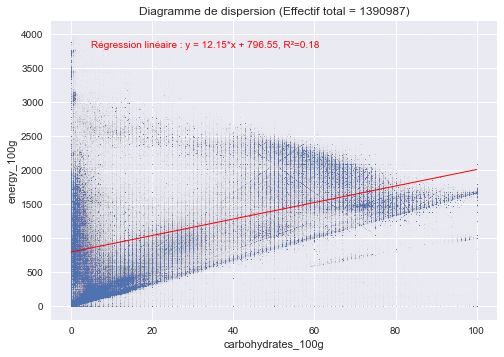

In [66]:
scatter_plot(df1['carbohydrates_100g'], df1['energy_100g'], max_y=4000)

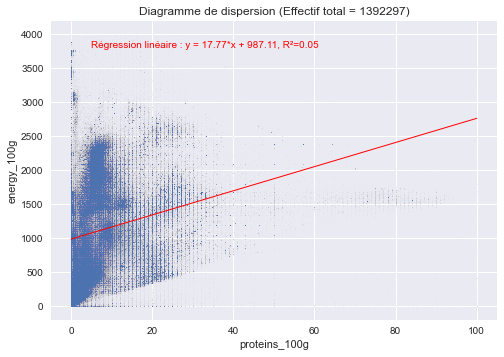

In [67]:
scatter_plot(df1['proteins_100g'], df1['energy_100g'], max_y=4000)

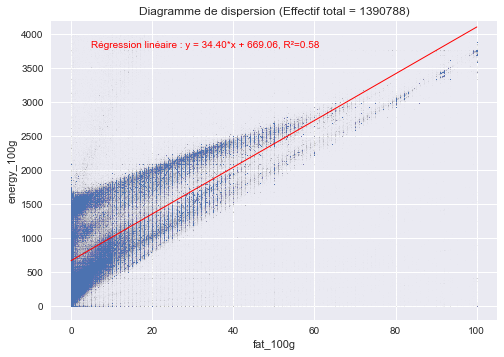

In [68]:
scatter_plot(df1['fat_100g'], df1['energy_100g'], max_y=4000)

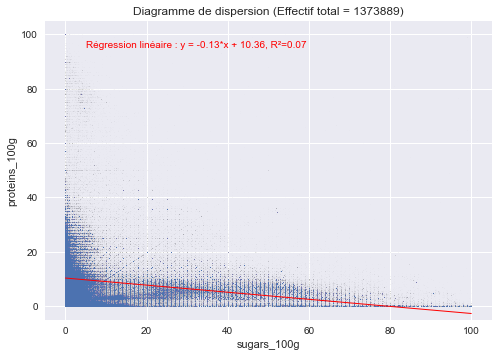

In [69]:
scatter_plot(df1['sugars_100g'], df1['proteins_100g'])

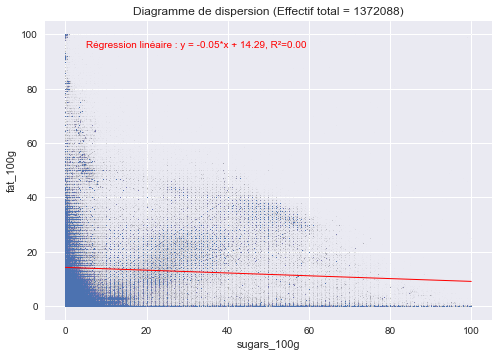

In [70]:
scatter_plot(df1['sugars_100g'], df1['fat_100g'])

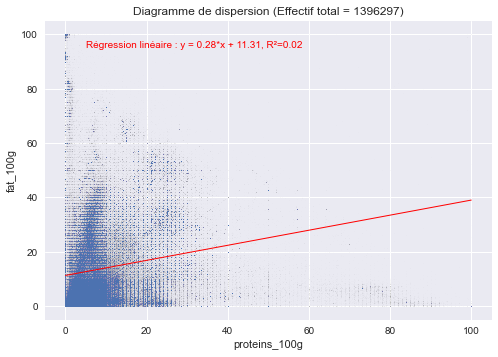

In [71]:
scatter_plot(df1['proteins_100g'], df1['fat_100g'])

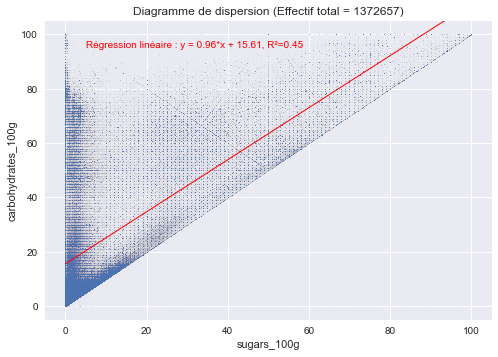

In [72]:
scatter_plot(df1['sugars_100g'], df1['carbohydrates_100g'])

Création de la série carbohydrates_not_sugars_100g

In [73]:
serie_carbohydrates_not_sugars_100g = df1['carbohydrates_100g'] - df1['sugars_100g']
serie_carbohydrates_not_sugars_100g.name = 'carbohydrates_not_sugars_100g'

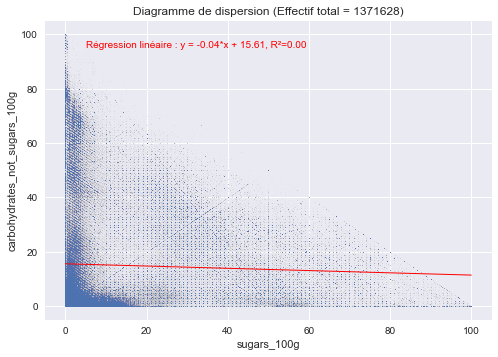

In [74]:
scatter_plot(df1['sugars_100g'], serie_carbohydrates_not_sugars_100g)

Création de la série serie_fat_not_saturated_100g

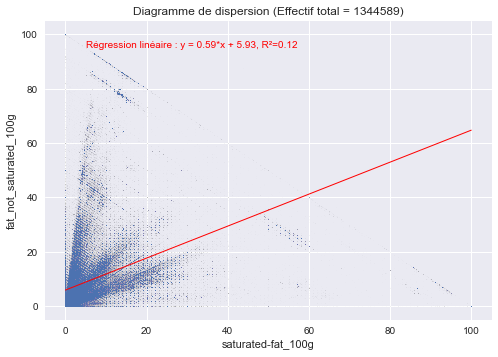

In [75]:
serie_fat_not_saturated_100g = df1['fat_100g'] - df1['saturated-fat_100g']
serie_fat_not_saturated_100g.name = 'fat_not_saturated_100g'
scatter_plot(df1['saturated-fat_100g'], serie_fat_not_saturated_100g)

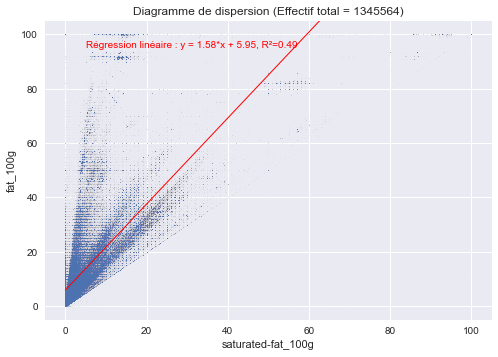

In [76]:
scatter_plot(df1['saturated-fat_100g'], df1['fat_100g'])

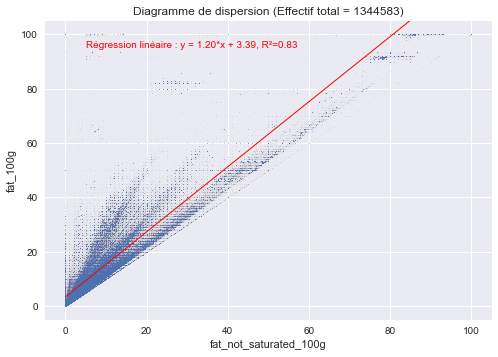

In [77]:
scatter_plot(serie_fat_not_saturated_100g, df1['fat_100g'])

### Tracé de scatter plots avec le nutriscore et les variables qui le composent

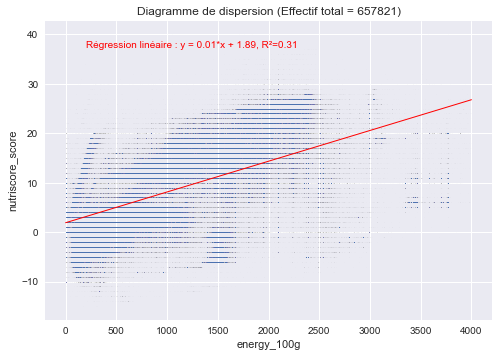

In [78]:
scatter_plot(df1['energy_100g'], df1['nutriscore_score'], min_x=0, max_x=4000, min_y=-15, max_y=40)

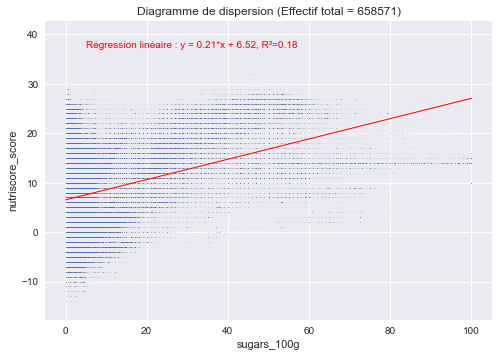

In [79]:
scatter_plot(df1['sugars_100g'], df1['nutriscore_score'], min_y=-15, max_y=40)

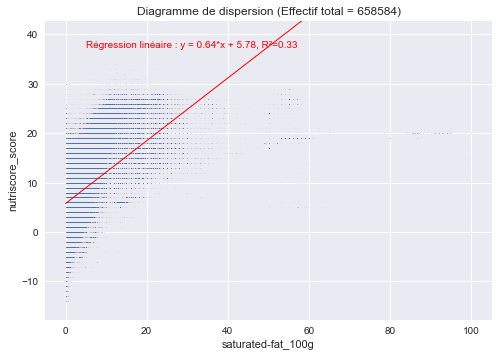

In [80]:
scatter_plot(df1['saturated-fat_100g'], df1['nutriscore_score'], min_y=-15, max_y=40)

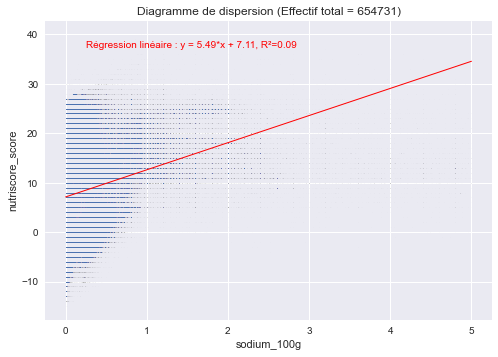

In [81]:
scatter_plot(df1['sodium_100g'], df1['nutriscore_score'], min_y=-15, max_y=40, max_x=5)

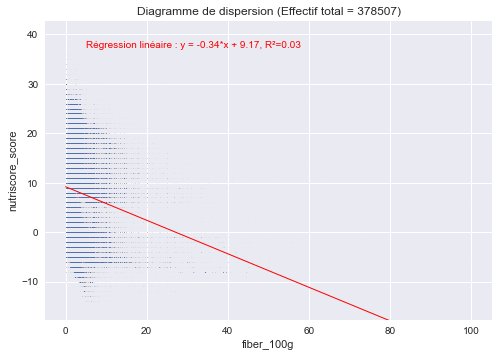

In [82]:
scatter_plot(df1['fiber_100g'], df1['nutriscore_score'], min_y=-15, max_y=40)

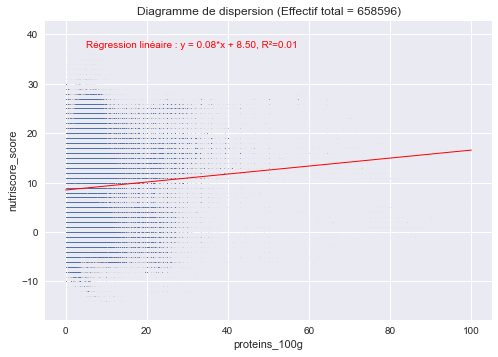

In [83]:
scatter_plot(df1['proteins_100g'], df1['nutriscore_score'], min_y=-15, max_y=40)

### Recherche de corrélation par force brute sur les variables quantitatives

In [84]:
liste_series = [
                [df1['energy_100g'], 0, 4000],
                [df1['sugars_100g'], 0, 100],
                [df1['saturated-fat_100g'], 0, 100],
                [df1['sodium_100g'], 0, 5],
                [df1['fiber_100g'], 0, 100], 
                [df1['proteins_100g'], 0, 100], 
    
                [df1['carbohydrates_100g'], 0, 100],
                [serie_carbohydrates_not_sugars_100g, 0, 100], 
                [df1['fat_100g'], 0, 100],
                [serie_fat_not_saturated_100g, 0, 100],     
    
                [df1['nutriscore_score'], -15, 40]]

sugars_100g en fct de energy_100g


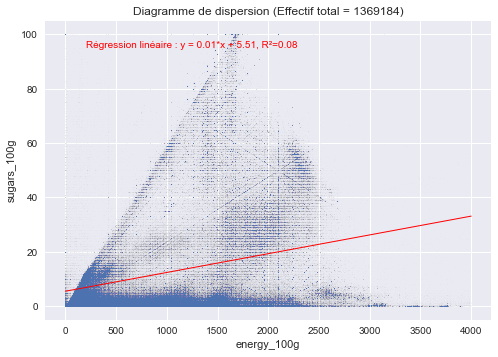

saturated-fat_100g en fct de energy_100g


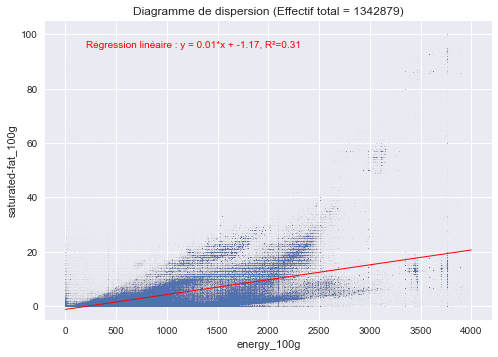

sodium_100g en fct de energy_100g


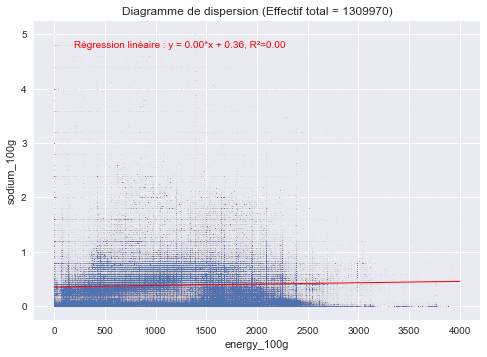

fiber_100g en fct de energy_100g


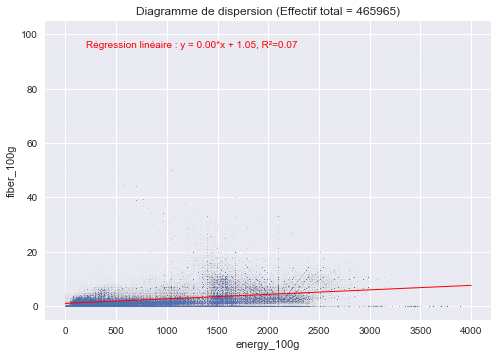

proteins_100g en fct de energy_100g


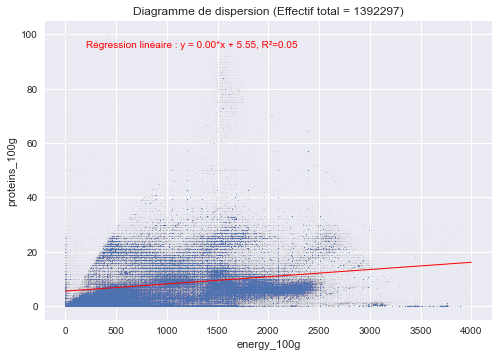

carbohydrates_100g en fct de energy_100g


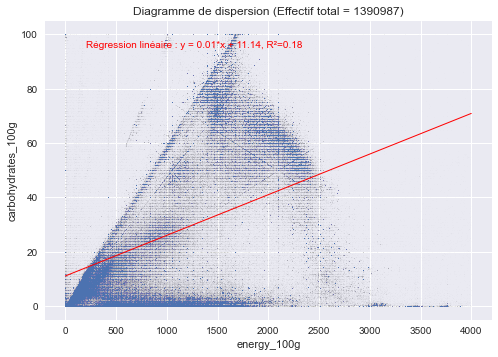

carbohydrates_not_sugars_100g en fct de energy_100g


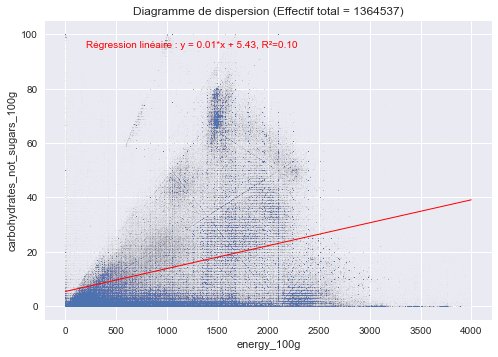

fat_100g en fct de energy_100g


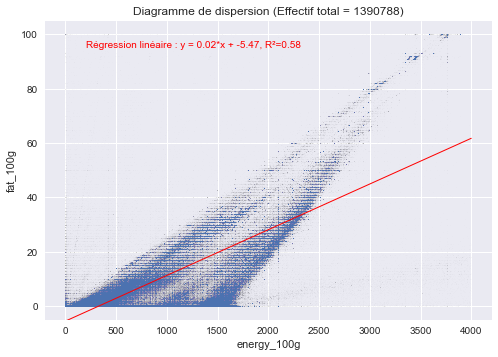

fat_not_saturated_100g en fct de energy_100g


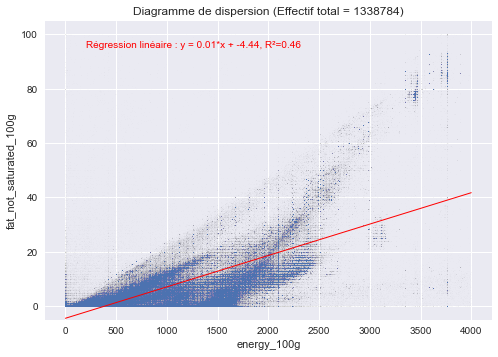

nutriscore_score en fct de energy_100g


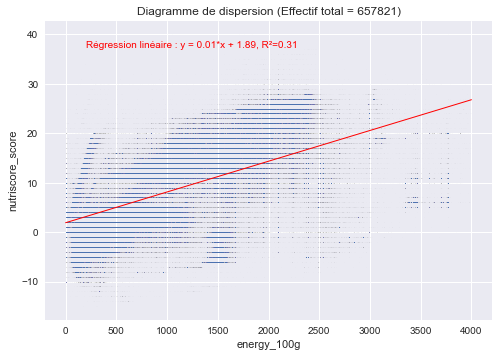

saturated-fat_100g en fct de sugars_100g


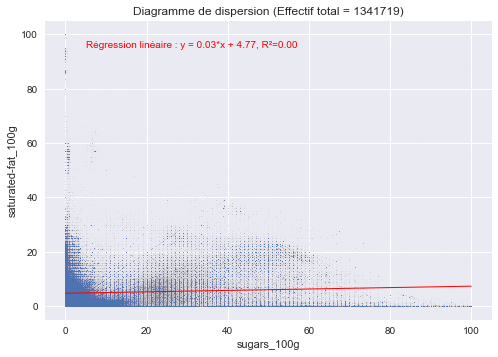

sodium_100g en fct de sugars_100g


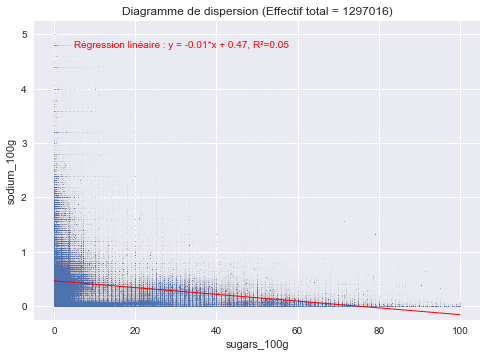

fiber_100g en fct de sugars_100g


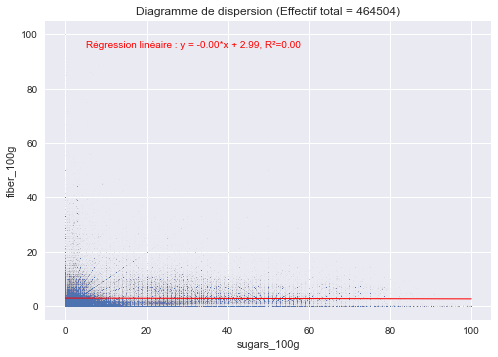

proteins_100g en fct de sugars_100g


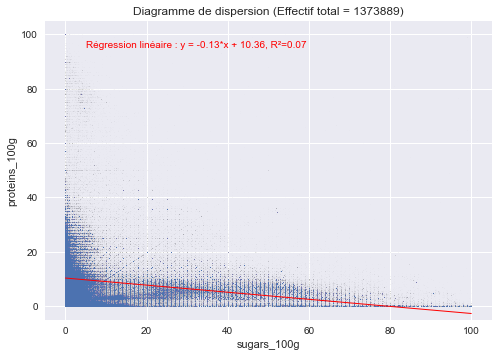

carbohydrates_100g en fct de sugars_100g


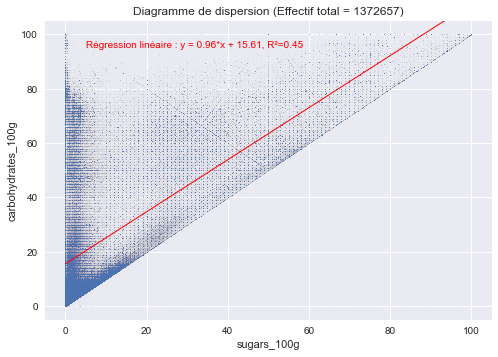

carbohydrates_not_sugars_100g en fct de sugars_100g


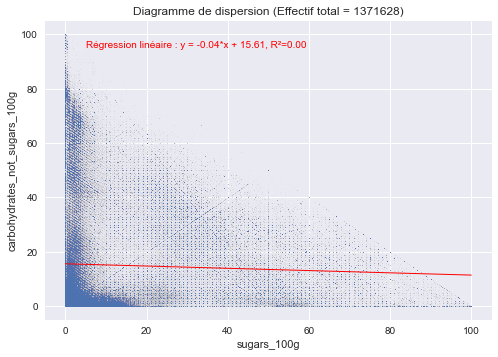

fat_100g en fct de sugars_100g


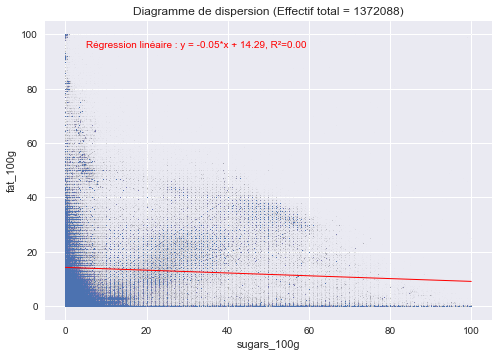

fat_not_saturated_100g en fct de sugars_100g


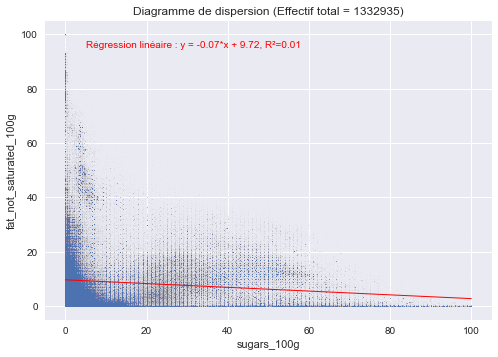

nutriscore_score en fct de sugars_100g


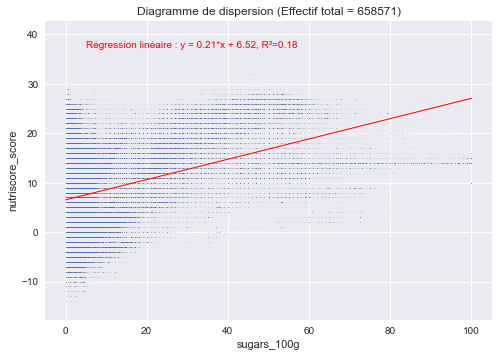

sodium_100g en fct de saturated-fat_100g


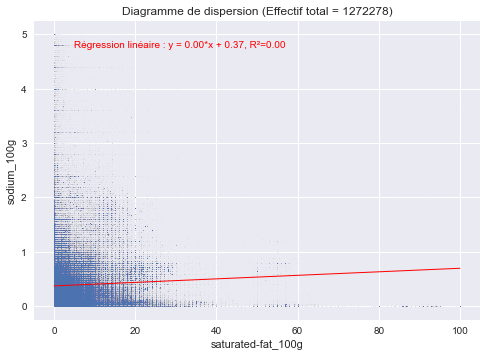

fiber_100g en fct de saturated-fat_100g


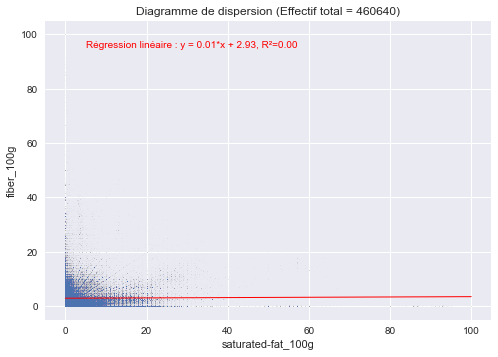

proteins_100g en fct de saturated-fat_100g


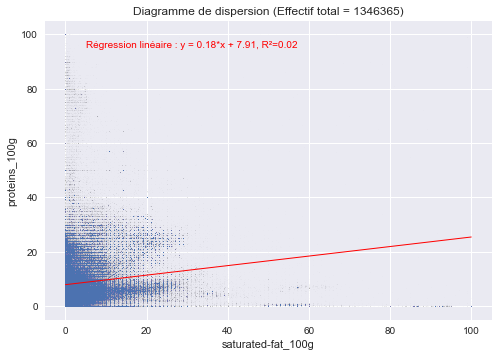

carbohydrates_100g en fct de saturated-fat_100g


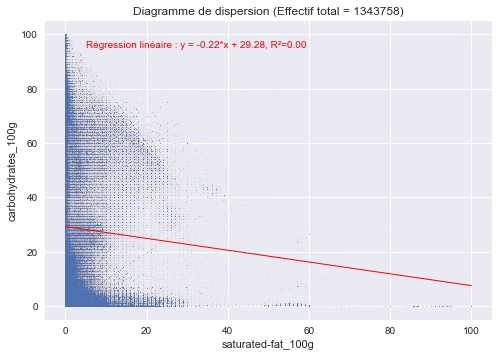

carbohydrates_not_sugars_100g en fct de saturated-fat_100g


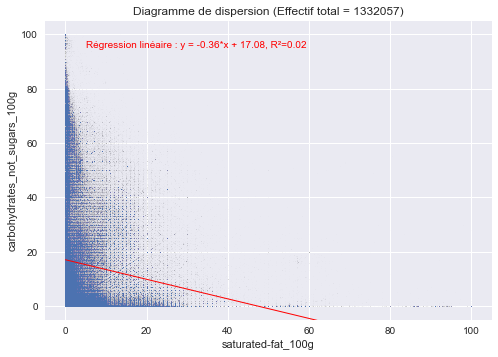

fat_100g en fct de saturated-fat_100g


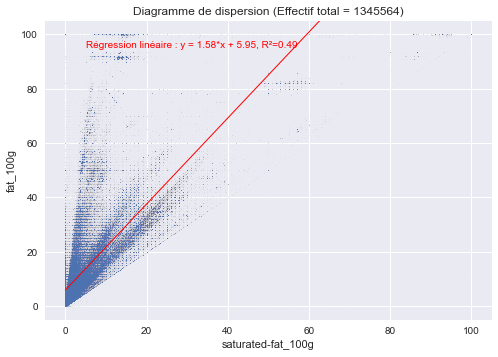

fat_not_saturated_100g en fct de saturated-fat_100g


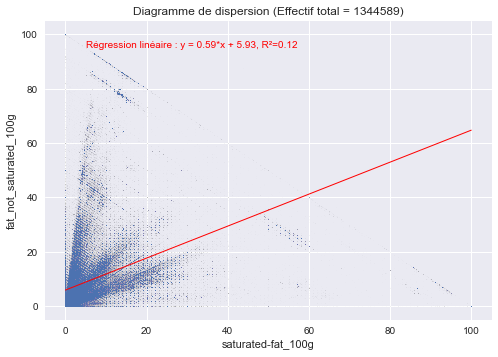

nutriscore_score en fct de saturated-fat_100g


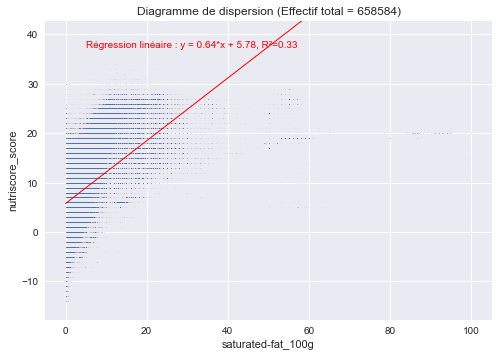

fiber_100g en fct de sodium_100g


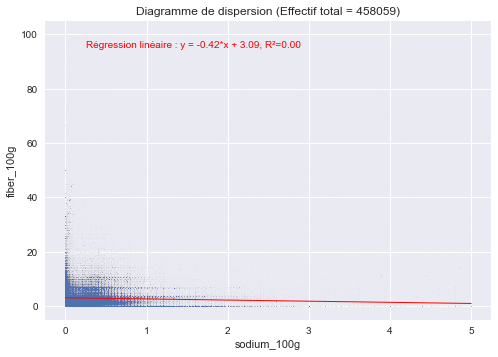

proteins_100g en fct de sodium_100g


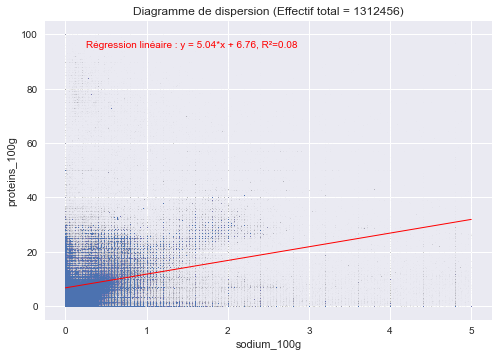

carbohydrates_100g en fct de sodium_100g


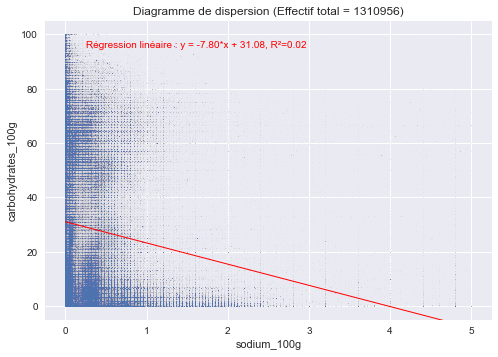

carbohydrates_not_sugars_100g en fct de sodium_100g


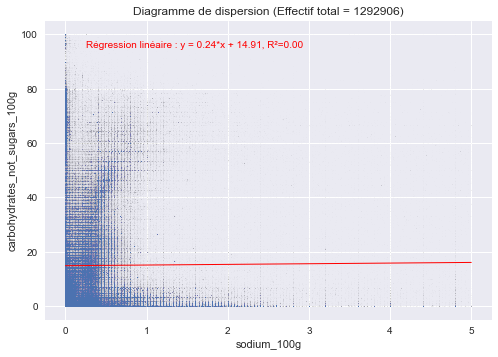

fat_100g en fct de sodium_100g


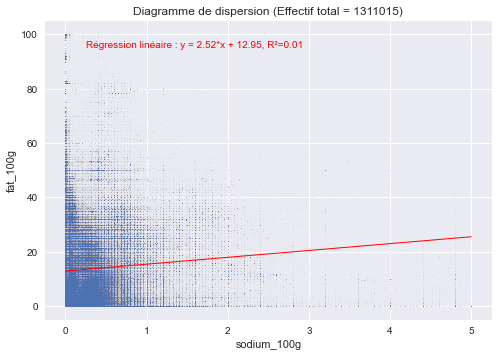

fat_not_saturated_100g en fct de sodium_100g


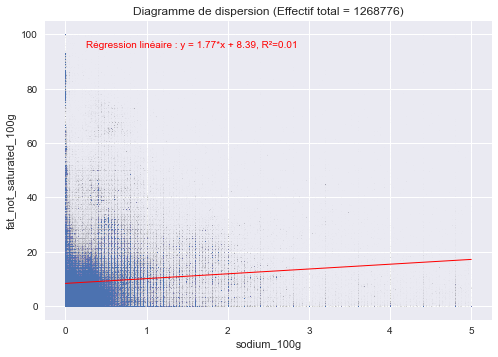

nutriscore_score en fct de sodium_100g


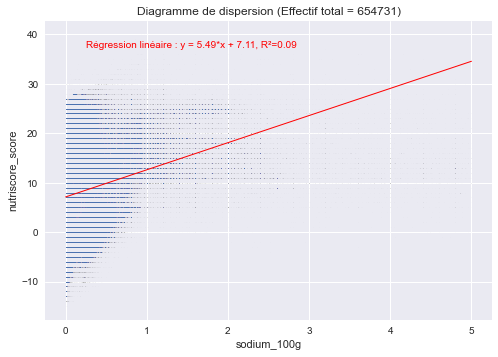

proteins_100g en fct de fiber_100g


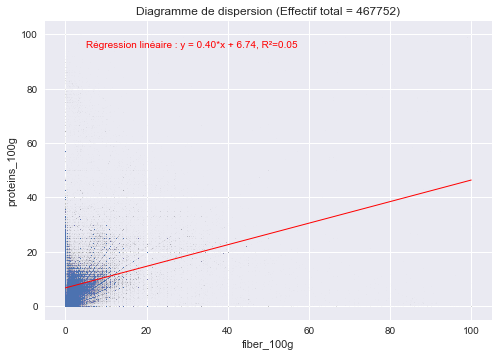

carbohydrates_100g en fct de fiber_100g


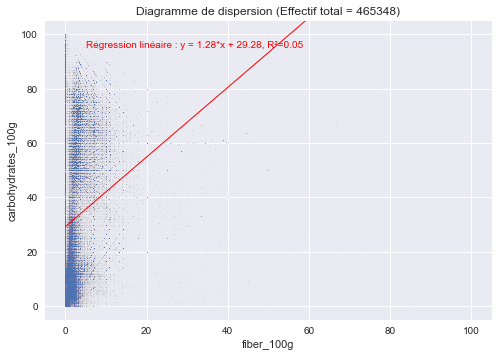

carbohydrates_not_sugars_100g en fct de fiber_100g


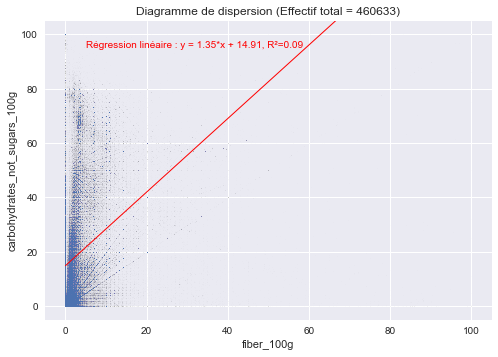

fat_100g en fct de fiber_100g


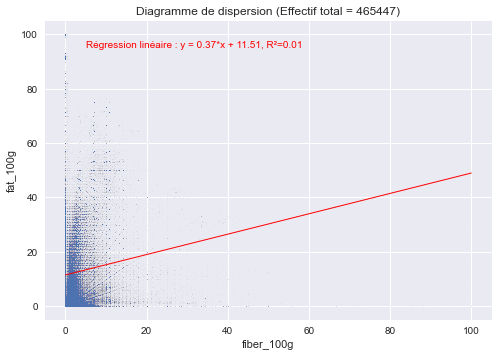

fat_not_saturated_100g en fct de fiber_100g


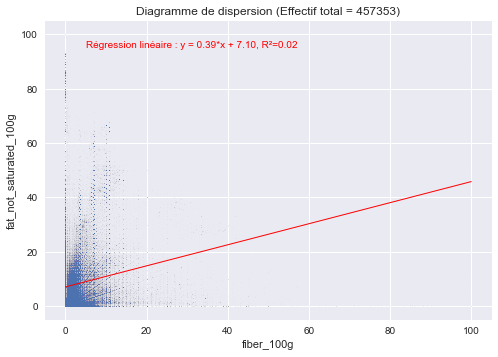

nutriscore_score en fct de fiber_100g


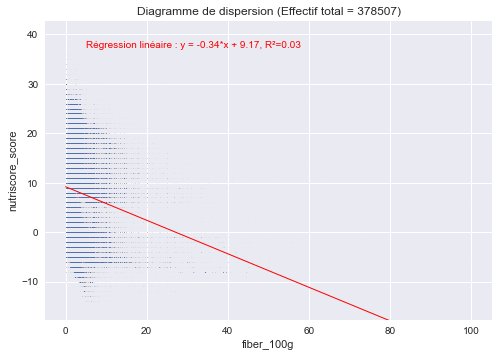

carbohydrates_100g en fct de proteins_100g


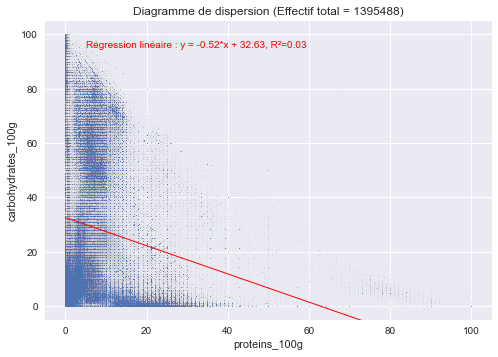

carbohydrates_not_sugars_100g en fct de proteins_100g


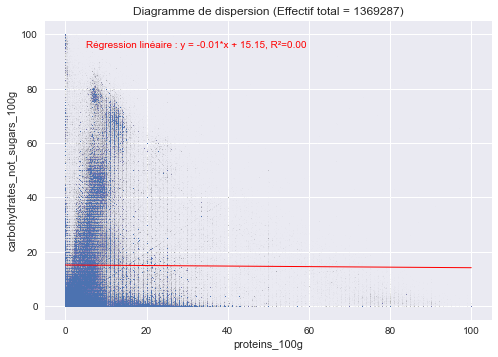

fat_100g en fct de proteins_100g


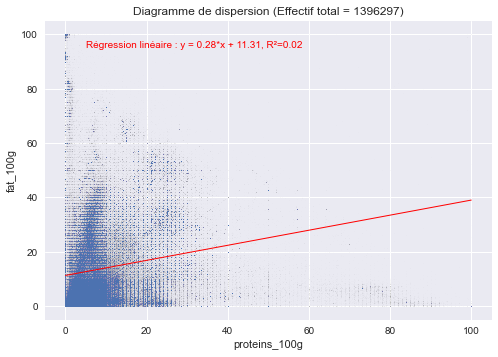

fat_not_saturated_100g en fct de proteins_100g


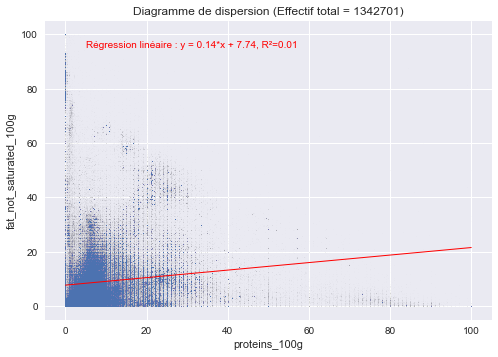

nutriscore_score en fct de proteins_100g


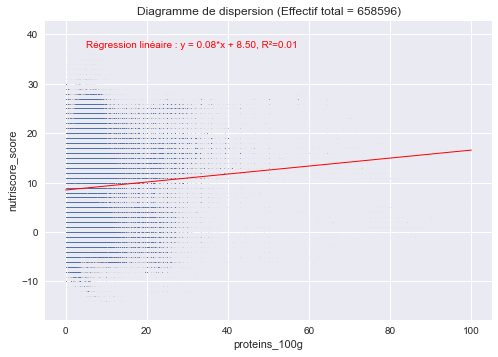

carbohydrates_not_sugars_100g en fct de carbohydrates_100g


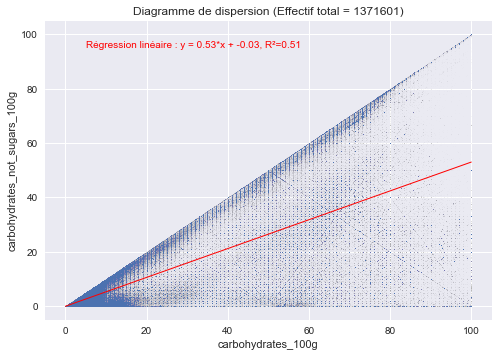

fat_100g en fct de carbohydrates_100g


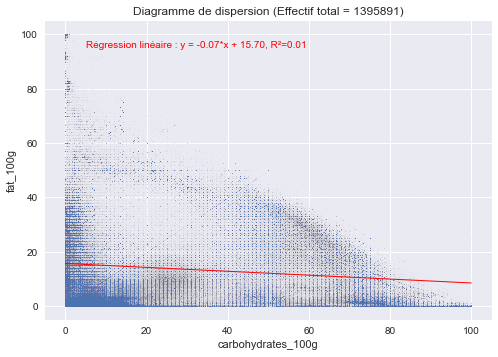

fat_not_saturated_100g en fct de carbohydrates_100g


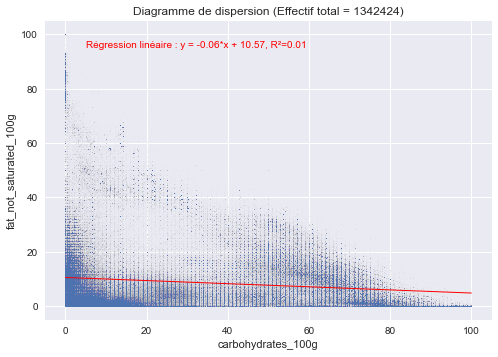

nutriscore_score en fct de carbohydrates_100g


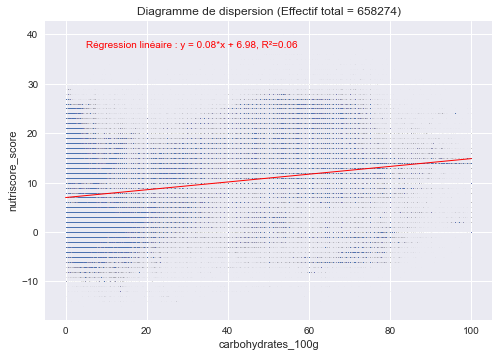

fat_100g en fct de carbohydrates_not_sugars_100g


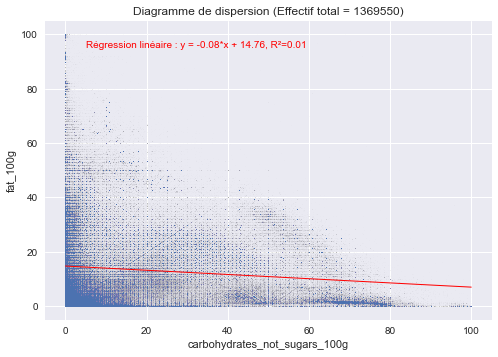

fat_not_saturated_100g en fct de carbohydrates_not_sugars_100g


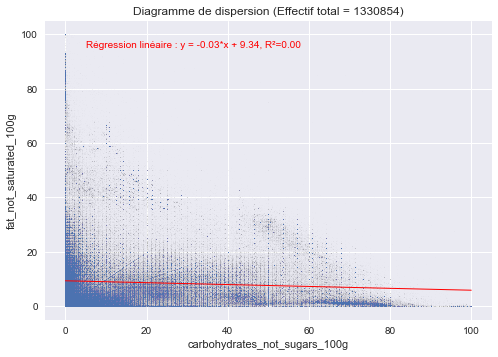

nutriscore_score en fct de carbohydrates_not_sugars_100g


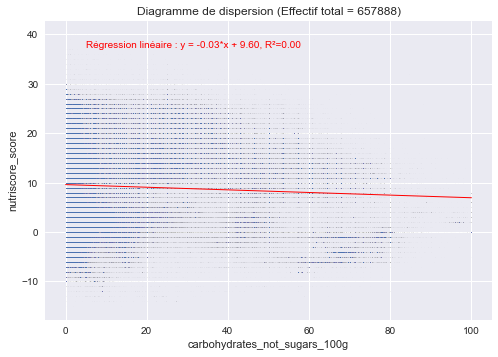

fat_not_saturated_100g en fct de fat_100g


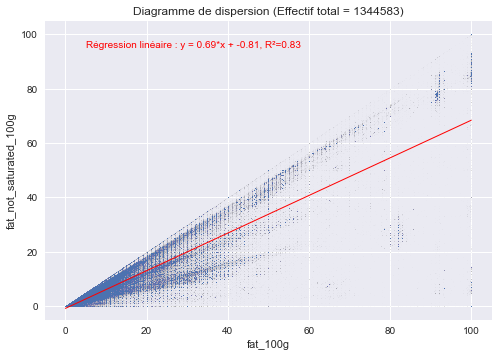

nutriscore_score en fct de fat_100g


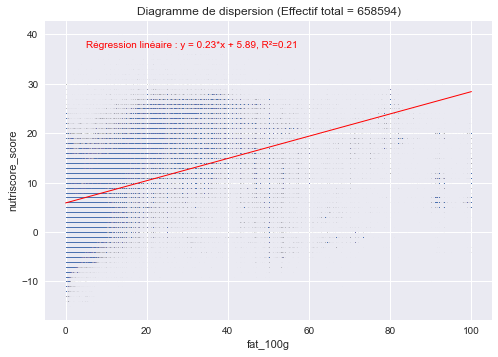

nutriscore_score en fct de fat_not_saturated_100g


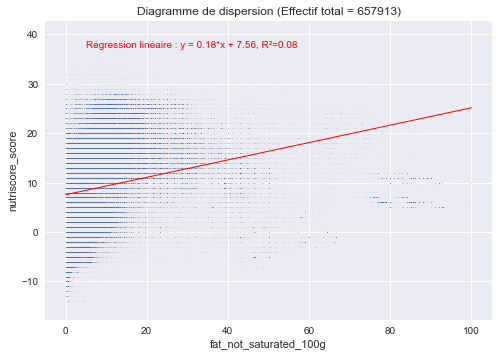

In [85]:
for x in range(0, len(liste_series)) :
    for y in range(x+1, len(liste_series)) :
        print (f"{liste_series[y][0].name} en fct de {liste_series[x][0].name}")
        scatter_plot(liste_series[x][0], liste_series[y][0], min_x=liste_series[x][1], max_x=liste_series[x][2], min_y=liste_series[y][1], max_y=liste_series[y][2])

## ANOVA sur des couples de variables quantitative et qualitative

### Fonction boites_moustache_multiples()

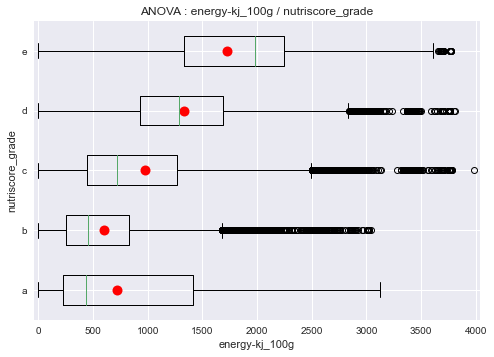

In [87]:
# def boites_moustaches_multiples(colonne='energy-kj_100g', min_x=None, max_x=None) :
min_x=0
max_x=4000
plt.style.use('seaborn')
data = []
labels = []
moyennes = []
medianes = []


# traitement du dataframe : données quantitatives
ser_x = df1['energy-kj_100g']
# ser_x.dropna(inplace=True)

# traitement du dataframe : données quanlitatives
ser_y = df1['nutriscore_grade']
ser_y_values = sorted(list(ser_y.dropna().unique()))

# filtration des valeurs aberrantes de ser_x. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
largeur = max_x - min_x
def f_bool_ser_x(x, min, max):
    if np.isnan(x) :
        return False
    elif x < min :
        return False
    elif x > max :
        return False
    else:
        return True
ser_x_bool = ser_x.apply(lambda x : f_bool_ser_x(x, min_x, max_x))     # vaut True pour les valeurs non aberrantes

# création des données du boxplot pour chaque valeur unique de ser_y
for ser_y_value in ser_y_values :
    ser_y_bool = ser_y.apply(lambda y : y == ser_y_value)
    ser_xy_bool = ser_x_bool.multiply(ser_y_bool)     # vaut True pour les valeurs non aberrantes de ser_x et lorsque ser_y vaut ser_y_value
    # ser_xy est la série tracée dans un boxplot spécifique à la valeur y
    ser_xy = ser_x[ser_xy_bool]
#     total_count = ser_xy_bool.sum()
    moyenne = ser_xy.mean()   
    mediane = ser_xy.median()    
    data.append(ser_xy)
    labels.append(ser_y_value)
    moyennes.append(moyenne)
    medianes.append(mediane)

y_coordinates = [x for x in range(1,len(labels)+1)]
    
# plotting boxplot
plt.boxplot(data, vert=0)
plt.xlim(min_x-0.01*largeur,max_x+0.01*largeur) 
# plt.ylim(1.25, 0.75) 
plt.title(label='ANOVA : '+ser_x.name+' / '+ser_y.name)
plt.yticks(ticks=y_coordinates, labels=labels)
plt.xlabel(ser_x.name)
plt.ylabel(ser_y.name)
# plotting dot "moyenne"
plt.plot(moyennes, y_coordinates, marker='o', markersize=10, color='red', linewidth=0)  
# annotations
# plt.annotate(text="Médiane = {0:0.2f}".format(mediane), xy=(min_x+largeur/20,0.8), color='green')
# plt.annotate(text="Moyenne = {0:0.2f}".format(moyenne), xy=(min_x+largeur/20,0.85), color='red')
# plt.annotate(text="Ecart-type = {0:0.2f}".format(ecart_type), xy=(min_x+largeur/20,0.9), color='blue')
plt.show()

## Récupérer les données de produits vendus en France

### Analyse des colonnes qui donnent le lieu de vente d'un produit

In [ ]:
df1['countries']

In [ ]:
df1['countries_tags']

In [ ]:
df1['countries_en']

In [ ]:
df1['states_en'][1111111]

In [ ]:
ser = df1['countries'].value_counts()
ser.head(100)

In [ ]:
ser.tail(10)

In [ ]:
ser = df1['countries_tags'].value_counts()
ser.head(100)

In [ ]:
ser.tail(10)

In [ ]:
ser = df1['countries_en'].value_counts()
ser.head(100)

In [ ]:
ser.tail(10)

Les variables 'countries_en' et 'countries_tags' renseignent les mêmes données. De plus les données sont similaires (noms des pays en anglais). La variable 'country' est plus difficilement exploitable, car les noms de pays sont indiqués en différentes langues.

=> on retient la variable 'countries_en' pour extraire les données relatives à la France

### Extraction des produits vendus en France

In [ ]:
df1_France = df1.copy()
ser = df1_France['countries_en'].copy()
ser = ser.apply(lambda x : str(x).find('France')!=-1)   # ser est une série de booléens indiquant si df2 contient 'France'
df1_France = df1_France[ser]

In [ ]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_France.loc[121111:122200])

Les produits sont souvent déclarés 'countries_en' == 'France' alors que c'est totalement faux. En particulier, pour les produits renseignés par Yuca (creator:kiliweb)